In [8]:
from scipy.io import netcdf
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from netCDF4 import Dataset

from IPython.display import display, Math, Latex, Image
from mpl_toolkits.basemap import Basemap
import mpl_toolkits

sys.path.append('/noc/users/am8e13/PyNGL-1.4.0/lib/python2.7/site-packages/PyNGL/')
import Ngl
sys.path.append('/noc/users/am8e13/Python/')
import komod
sys.path.append('/noc/users/am8e13/Python/PyNIO-1.4.0/')
import Nio

from python_functions import *
import random
import calendar

from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [113]:
# Readomg the Nemo and Noaa file
Nemo25 = nemo()
Nemo25.read_nemo('25')
Noaa = noaa()
Noaa.read_noaa()

In [11]:
obcs = Obcs()
obcs.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/obcsdata/newdownloaded/',12,'_tempmod2',36)
woa = Woa()
phc = Phc()

In [12]:
first_spinup = StateRead()
first_spinup.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results0/')
first_spinup.readData(range(270 + 72, 270 + 90,1))
first_spinup.baroCalc()
first_spinup.fluxCalc()
first_spinup.mxldepthread(range(12))
first_spinup.seaiceread(range(12))
first_spinup.title('Old spinup')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results0/


In [13]:
first_sponge = StateRead()
first_sponge.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results0/')
first_sponge.readData(range(1080-18,1080,1))
first_sponge.baroCalc()
first_sponge.fluxCalc()
first_sponge.mxldepthread(range(12))
first_sponge.seaiceread(range(12))
first_sponge.title('1m sponge')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results0/


In [14]:
timescale_1year = StateRead()
timescale_1year.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_timescale/results/')
timescale_1year.readData(range(1080-18,1080,1))
timescale_1year.baroCalc()
timescale_1year.fluxCalc()
#timescale_1year.mxldpethread(range(12))
#timescale_1year.seaiceread(range(12))
timescale_1year.title('1y Sponge')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_timescale/results/


In [15]:
nonscaled_obcs = StateRead()
nonscaled_obcs.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_noscaled/results/')
nonscaled_obcs.readData(range(1080-18,1080,1))
nonscaled_obcs.baroCalc()
nonscaled_obcs.mxldepthread(range(12))
nonscaled_obcs.seaiceread(range(12))
nonscaled_obcs.fluxCalc()
nonscaled_obcs.title('Noscal Sponge')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_noscaled/results/


In [16]:
noseaice_run = StateRead()
noseaice_run.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_noice/results/')
noseaice_run.readData(range(1080-18,1080,1))
noseaice_run.baroCalc()
noseaice_run.mxldepthread(range(12))
noseaice_run.fluxCalc()
noseaice_run.title('Noseaice')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_noice/results/


In [17]:
short_timescale_run = StateRead()
short_timescale_run.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_5d_tsc/results/')
short_timescale_run.readData(range(1080-18,1080,1))
short_timescale_run.baroCalc()
short_timescale_run.mxldepthread(range(12))
short_timescale_run.fluxCalc()
short_timescale_run.title('5d timescale')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_5d_tsc/results/


In [18]:
short_timescale_low_visc_run = StateRead()
short_timescale_low_visc_run.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_visc+5d/results/')
short_timescale_low_visc_run.readData(range(1080-18,1080,1))
short_timescale_low_visc_run.baroCalc()
short_timescale_low_visc_run.mxldepthread(range(12))
short_timescale_low_visc_run.fluxCalc()
short_timescale_low_visc_run.title('low visc + 5d tsc')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_visc+5d/results/


In [19]:
low_visc_run = StateRead()
low_visc_run.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_viscosity/results/')
low_visc_run.readData(range(1080-18,1080,1))
low_visc_run.baroCalc()
low_visc_run.mxldepthread(range(12))
low_visc_run.fluxCalc()
low_visc_run.title('Low viscosity')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_viscosity/results/


In [20]:
nonscale_18_run = StateRead()
nonscale_18_run.getPath('/hpcdata/scratch/am8e13/arctic420x384/run_sponge_noscale/results/')
nonscale_18_run.readData(range(218-18,218,1))
nonscale_18_run.baroCalc()
nonscale_18_run.mxldepthread(range(12))
nonscale_18_run.fluxCalc()
nonscale_18_run.title('Nonscale 18')

Data read from /hpcdata/scratch/am8e13/arctic420x384/run_sponge_noscale/results/


In [21]:
scaled_18_run = StateRead()
scaled_18_run.getPath('/hpcdata/scratch/am8e13/arctic420x384/run_sponge_scaled/results/')
scaled_18_run.readData(range(218-18,218,1))
scaled_18_run.baroCalc()
scaled_18_run.mxldepthread(range(12))
scaled_18_run.fluxCalc()
scaled_18_run.title('Scaled obcs 18')

Data read from /hpcdata/scratch/am8e13/arctic420x384/run_sponge_scaled/results/


In [22]:
CORE_sponge = StateRead()
CORE_sponge.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_sponge/results/')
CORE_sponge.readData(range(1080-18,1080,1))
CORE_sponge.baroCalc()
CORE_sponge.mxldepthread(range(12))
CORE_sponge.seaiceread(range(12))
CORE_sponge.fluxCalc()
CORE_sponge.title('core sponge')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_sponge/results/


In [23]:
CORE_nosponge = StateRead()
CORE_nosponge.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_nosponge/results/')
CORE_nosponge.readData(range(1080-18,1080,1))
CORE_nosponge.baroCalc()
CORE_nosponge.mxldepthread(range(12))
CORE_nosponge.seaiceread(range(12))
CORE_nosponge.fluxCalc()
CORE_nosponge.title('core nosponge')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_nosponge/results/


In [24]:
def lit_data():
    liq10 = {'Fram' : {'Inflow' : 3.9, 'Outflow' : -5.5, 'Total flow' : -1.6} ,
             'Fram1' : {'Inflow' : 3.9, 'Outflow' : -5.5, 'Total flow' : -1.6} ,
             'Fram2' : {'Inflow' : 3.9, 'Outflow' : -5.5, 'Total flow' : -1.6} ,
             'Barents' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :2.9} ,
             'Barents1' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :2.9} ,
             'Barents2' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :2.9} ,
             'Bering': {'Inflow' : 1.3, 'Outflow' : 0.0, 'Total flow' :1.3} ,
             'Davis': {'Inflow' : 0.6, 'Outflow' : -3.2, 'Total flow' :-2.6},
             'Davis2': {'Inflow' : 0.6, 'Outflow' : -3.2, 'Total flow' :-2.6},
             'Davis1': {'Inflow' : 0.6, 'Outflow' : -3.2, 'Total flow' :-2.6}
            }
    core2 =  {'Fram' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : -1.95} ,
              'Fram1' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : -1.95} ,
              'Fram2' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : -1.95} ,
             'Barents' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : 2.53} ,
             'Barents1' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : 2.53} ,
             'Barents2' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : 2.53} ,
             'Bering': {'Inflow' : [], 'Outflow' : [], 'Total flow' : 0.99} ,
             'Davis': {'Inflow' : [], 'Outflow' : [], 'Total flow' :-1.75},
             'Davis2': {'Inflow' : [], 'Outflow' : [], 'Total flow' :-1.75},
             'Davis1': {'Inflow' : [], 'Outflow' : [], 'Total flow' :-1.75}
            }
    obs =   {'Fram' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : '-2.0+/-2.7'} ,
             'Fram1' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : '-2.0+/-2.7'} ,
             'Fram2' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : '-2.0+/-2.7'} ,
             'Barents' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :'2-2.3'} ,
             'Barents1' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :'2-2.3'} ,
             'Barents2' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :'2-2.3'} ,
             'Bering': {'Inflow' : [], 'Outflow' : [], 'Total flow' :'0.8+/-0.2'} ,
             'Davis': {'Inflow' : [], 'Outflow' : [], 'Total flow' :'-2.6+/-1.0'},
             'Davis2': {'Inflow' : [], 'Outflow' : [], 'Total flow' :'-2.6+/-1.0'},
             'Davis1': {'Inflow' : [], 'Outflow' : [], 'Total flow' :'-2.6+/-1.0'}
            }
    return liq10,core2,obs

In [25]:
liq10,core2,obs = lit_data();
for var in ['Barents','Barents1','Barents2','Bering','Fram','Fram1','Fram2','Davis','Davis1','Davis2']:
    print var
    print 'first ',first_spinup.totalFluxes[var]
    print 'spong ',first_sponge.totalFluxes[var]
    print 'noscal',nonscaled_obcs.totalFluxes[var]
    #print 'lw_vis',low_visc_run.totalFluxes[var]
    #print '5d_tsc',short_timescale_run.totalFluxes[var]
    #print '5d_vis',short_timescale_low_visc_run.totalFluxes[var]
    #print 'noice ',noseaice_run.totalFluxes[var]
    #print 'nos_18',nonscale_18_run.totalFluxes[var]
    #print 'sca_18',scaled_18_run.totalFluxes[var]
    print 'COR_sp',CORE_sponge.totalFluxes[var]
    print 'COR_ns',CORE_nosponge.totalFluxes[var]
    print 'liq10 ',liq10[var]
    print 'Core2 ',core2[var]
    print 'obsv  ',obs[var]

Barents
first  {'Outflow': -0.7, 'Total flow': 0.09, 'Inflow': 0.79}
spong  {'Outflow': -0.77, 'Total flow': -0.05, 'Inflow': 0.72}
noscal {'Outflow': -1.05, 'Total flow': -0.53, 'Inflow': 0.52}
COR_sp {'Outflow': -3.23, 'Total flow': 0.09, 'Inflow': 3.31}
COR_ns {'Outflow': -3.22, 'Total flow': -0.32, 'Inflow': 2.9}
liq10  {'Outflow': 4.1, 'Total flow': 2.9, 'Inflow': -1.2}
Core2  {'Outflow': [], 'Total flow': 2.53, 'Inflow': []}
obsv   {'Outflow': 4.1, 'Total flow': '2-2.3', 'Inflow': -1.2}
Barents1
first  {'Outflow': -0.78, 'Total flow': -0.11, 'Inflow': 0.67}
spong  {'Outflow': -0.73, 'Total flow': -0.0, 'Inflow': 0.72}
noscal {'Outflow': -1.15, 'Total flow': -0.63, 'Inflow': 0.52}
COR_sp {'Outflow': -3.34, 'Total flow': -0.18, 'Inflow': 3.17}
COR_ns {'Outflow': -3.35, 'Total flow': -0.54, 'Inflow': 2.81}
liq10  {'Outflow': 4.1, 'Total flow': 2.9, 'Inflow': -1.2}
Core2  {'Outflow': [], 'Total flow': 2.53, 'Inflow': []}
obsv   {'Outflow': 4.1, 'Total flow': '2-2.3', 'Inflow': -1.2}


In [26]:
#aaa

In [27]:
barents,fram,bering,davis,arctic1,arctic2,arctic3,arctic4 = arctic_reg()

In [28]:
comp_data = {'first_spinup' : first_spinup , 'first_sponge' : first_sponge , 'noseaice_run' : noseaice_run ,\
            'nonscaled_obcs' : nonscaled_obcs , 'Noaa' : Noaa , 'low_visc_run' : low_visc_run , \
            'short_timescale_run' : short_timescale_run , \
            'short_timescale_low_visc_run' : short_timescale_low_visc_run , 
            'nonscale_18_run' : nonscale_18_run , 'scaled_18_run' : scaled_18_run, 'CORE_sponge' : CORE_sponge,
            'CORE_nosponge' : CORE_nosponge}

In [29]:
comp_data = {0 : first_spinup , 1 : first_sponge , 2 : CORE_sponge , 3 : nonscaled_obcs , \
             4 : low_visc_run , 5 : CORE_nosponge , 6 : short_timescale_low_visc_run ,
             7 : nonscale_18_run , 8 : woa}

In [30]:
comp_data1 = {0 : first_spinup , 1 : first_sponge , 2 : CORE_sponge , 3 : nonscaled_obcs , \
             4 : low_visc_run , 5 : CORE_nosponge , 6 : short_timescale_low_visc_run ,
             7 : nonscale_18_run , 8 : woa}

In [31]:
def plot_psi_arrow_tot():
    fig,axes = plt.subplots(3,3)
    vimin = -20
    vimax = 20
    ind = 0
    for ax in axes.flat:
        ax.set_title(comp_data1[ind].title)
        masked_array = np.ma.array(comp_data1[ind].psi_ave[:,:], mask=np.isnan(comp_data1[ind].psi_ave[:,:]))
        cmap= matplotlib.cm.seismic
        cmap.set_bad('grey',1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="upper")
        if comp_data1[ind].res == 36:
            kk = 1
        elif comp_data1[ind].res == 18:
            kk = 2
        for x in range(len(comp_data1[ind].X)-1,1,-5*kk):
            for y in range(len(comp_data1[ind].Y)-1,1,-5*kk):
                ax.arrow(comp_data1[ind].X[x],comp_data1[ind].Y[y],comp_data1[ind].Uda[y,x]*80,comp_data1[ind].Vda[y,x]*80)
        cbar = fig.colorbar(ca,ax=ax )
        ind +=1
        fig.subplots_adjust(right=2.6,top=2.)
comp_data1 = {0 : first_spinup , 1 : first_sponge , 2 : CORE_nosponge , 3 : nonscaled_obcs , \
             4 : low_visc_run , 5 : CORE_sponge , 6 : short_timescale_low_visc_run ,
             7 : nonscale_18_run , 8 : scaled_18_run}

In [32]:
def plot_psi_arrow(data):
    fig,axes = plt.subplots(1,1)
    vimin = -20
    vimax = 20
    masked_array = np.ma.array(data.psi_ave[:,:], mask=np.isnan(data.psi_ave[:,:]))
    cmap= matplotlib.cm.seismic
    cmap.set_bad('grey',1.)
    if data.res == 36:
        kk = 1
    elif data.res == 18:
        kk = 2
    ca = imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="upper")
    for x in range(len(data.X)-1,1,-3*kk):
        for y in range(len(data.Y)-1,1,-3*kk):
            plt.arrow(data.X[x],data.Y[y],data.Uda[y,x]*60,data.Vda[y,x]*60)
    cbar = fig.colorbar(ca)
    fig.subplots_adjust(right=2.4,top=2.)

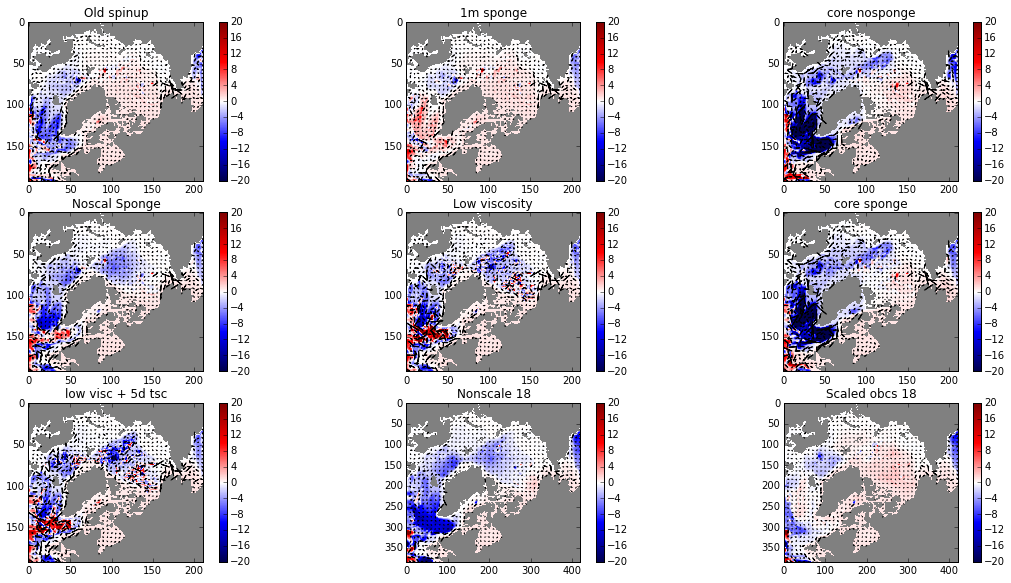

In [33]:
plot_psi_arrow_tot()

Average of the frist 55-60 years with no sponge on OBCS

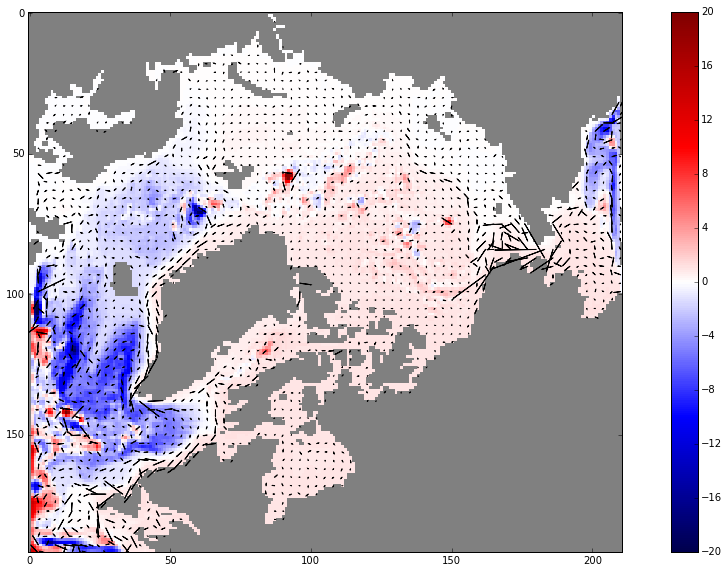

In [34]:
plot_psi_arrow(first_spinup)

Average of the frist 55-60 years with nonscaled obcs with sponge on OBCS

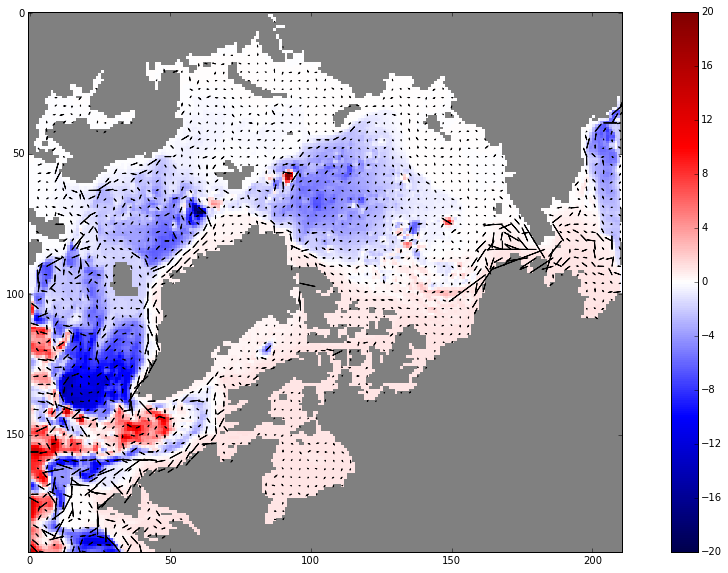

In [35]:
plot_psi_arrow(nonscaled_obcs)

Average of the frist 55-60 years with sponge 1 month timescale and scaled OBCS

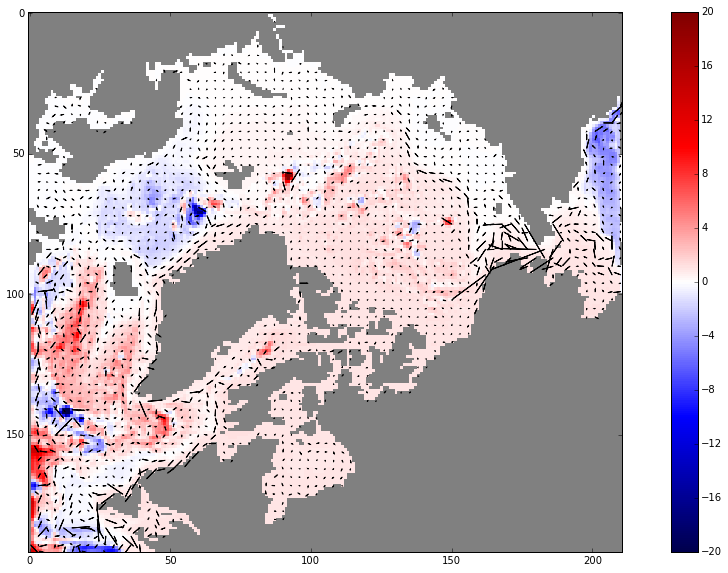

In [36]:
plot_psi_arrow(first_sponge)

Average of the frist 55-60 years with sponge 1 year timescale and scaled OBCS

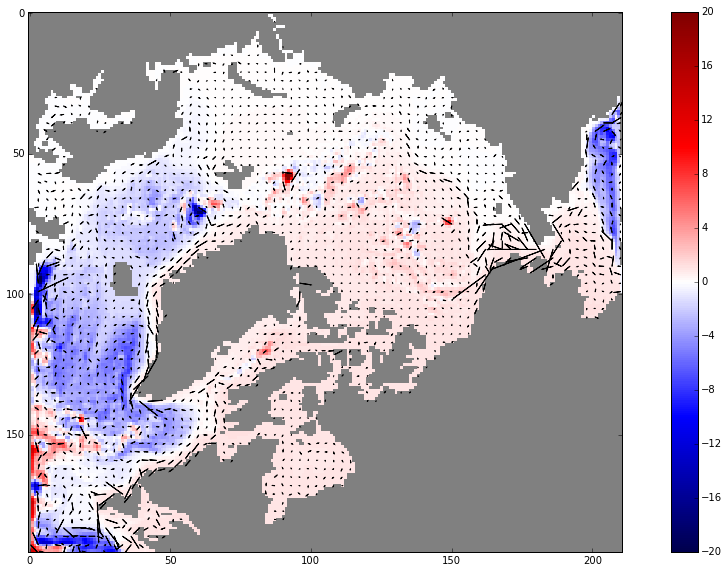

In [37]:
plot_psi_arrow(timescale_1year)

Average of the frist 55-60 years with no seaice

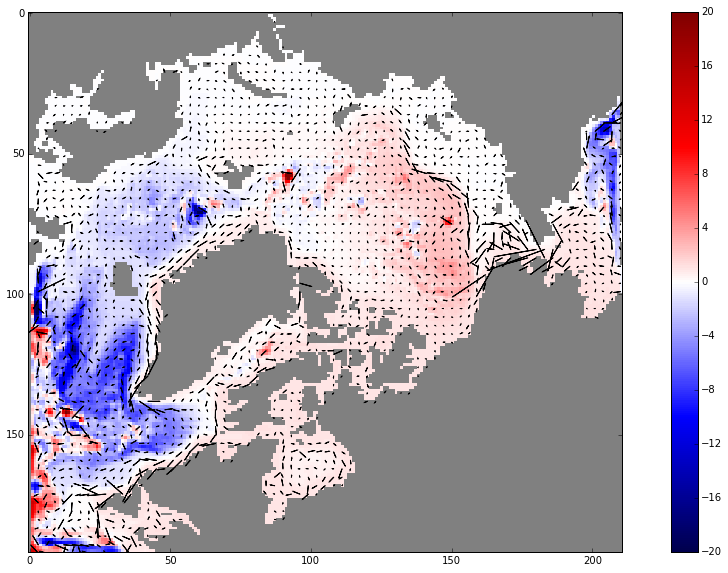

In [38]:
plot_psi_arrow(noseaice_run)

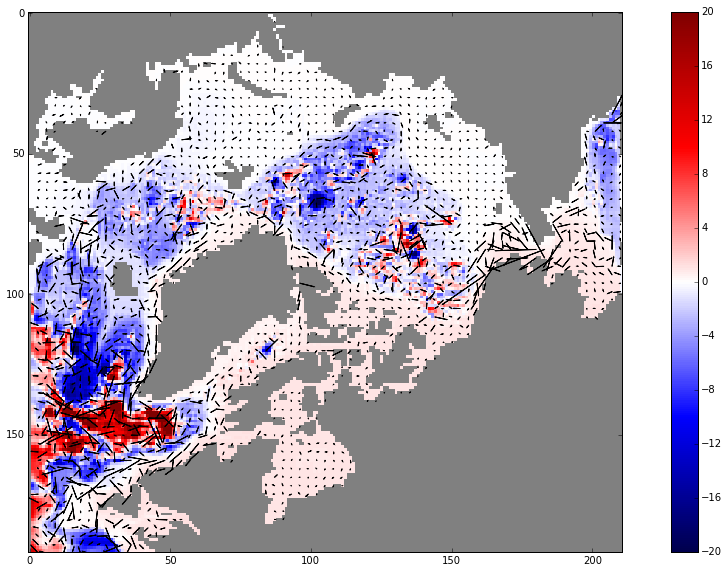

In [39]:
plot_psi_arrow(low_visc_run)

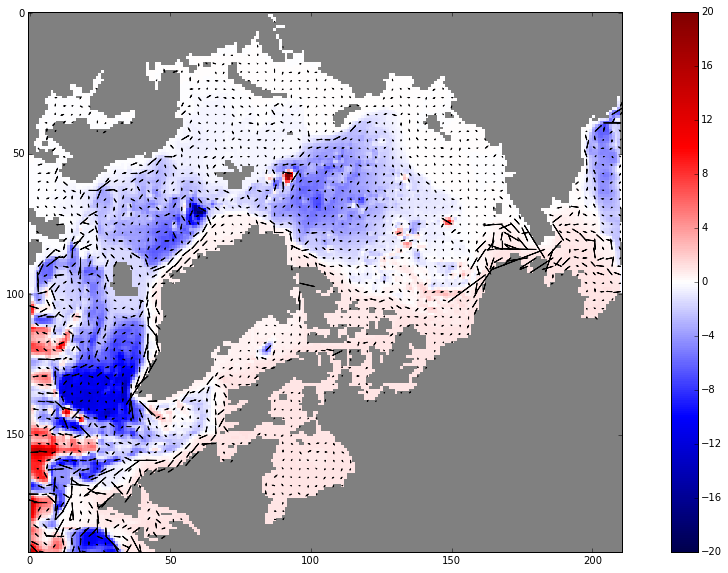

In [40]:
plot_psi_arrow(short_timescale_run)

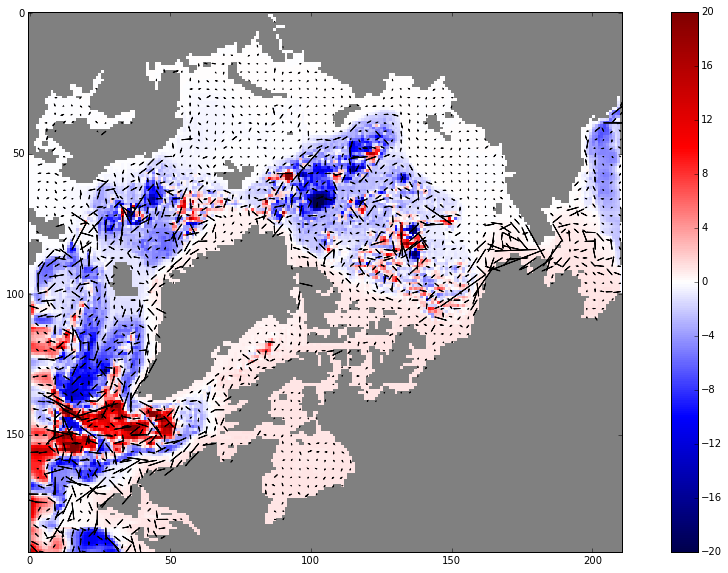

In [41]:
plot_psi_arrow(short_timescale_low_visc_run)

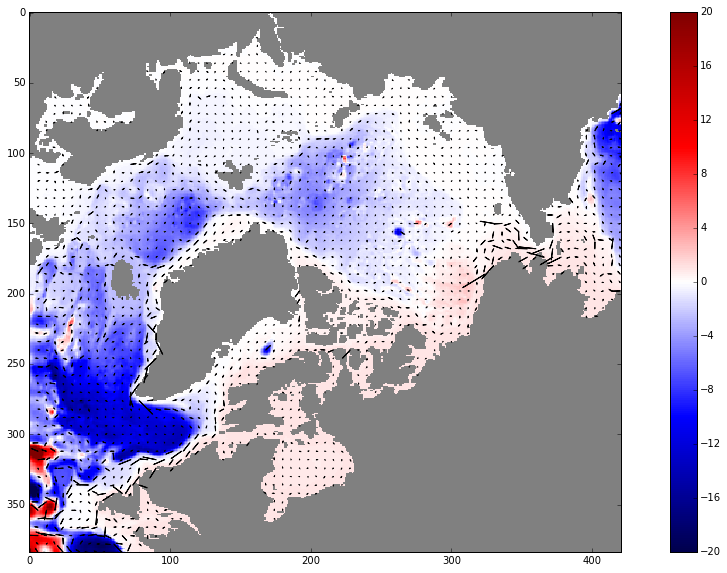

In [42]:
plot_psi_arrow(nonscale_18_run)

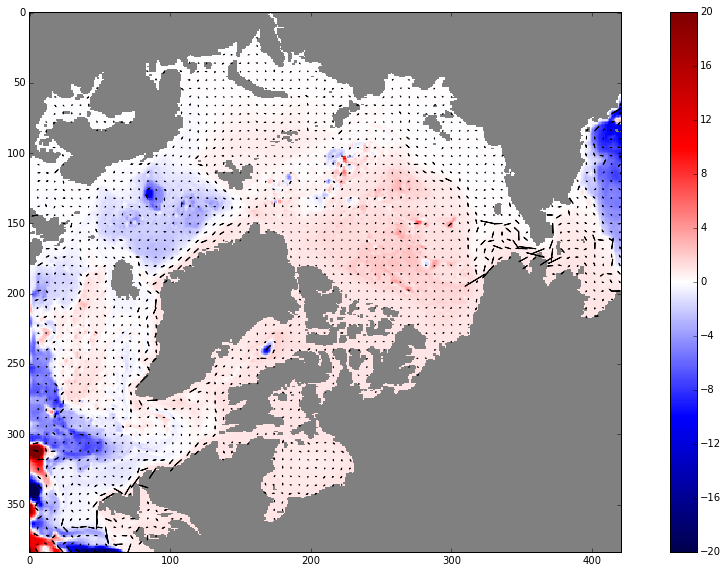

In [43]:
plot_psi_arrow(scaled_18_run)

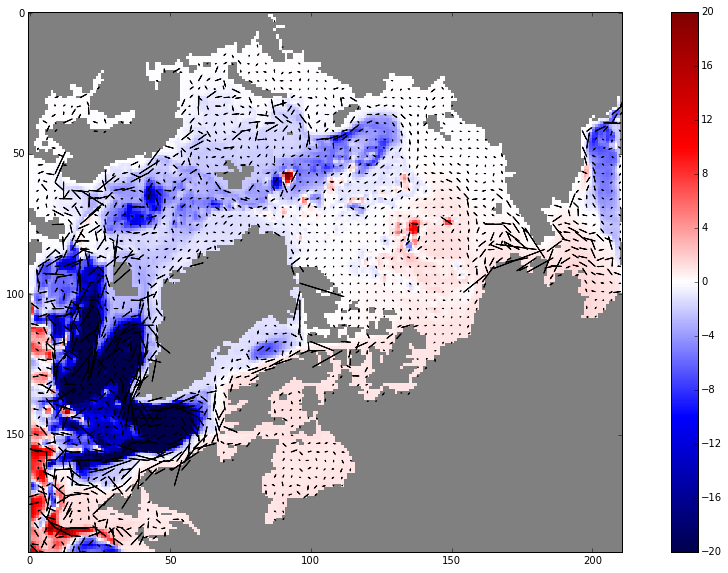

In [44]:
plot_psi_arrow(CORE_sponge)

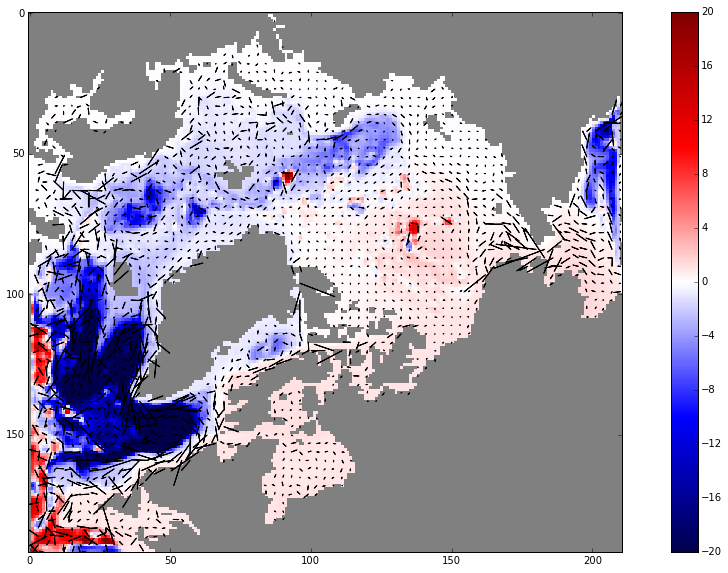

In [45]:
plot_psi_arrow(CORE_nosponge)

In [114]:
comp_data = {0 : first_spinup , 1 : first_sponge , 2 : CORE_sponge , 3 : nonscaled_obcs , \
             4 : low_visc_run , 5 : CORE_nosponge , 6 : woa}

Fram strait

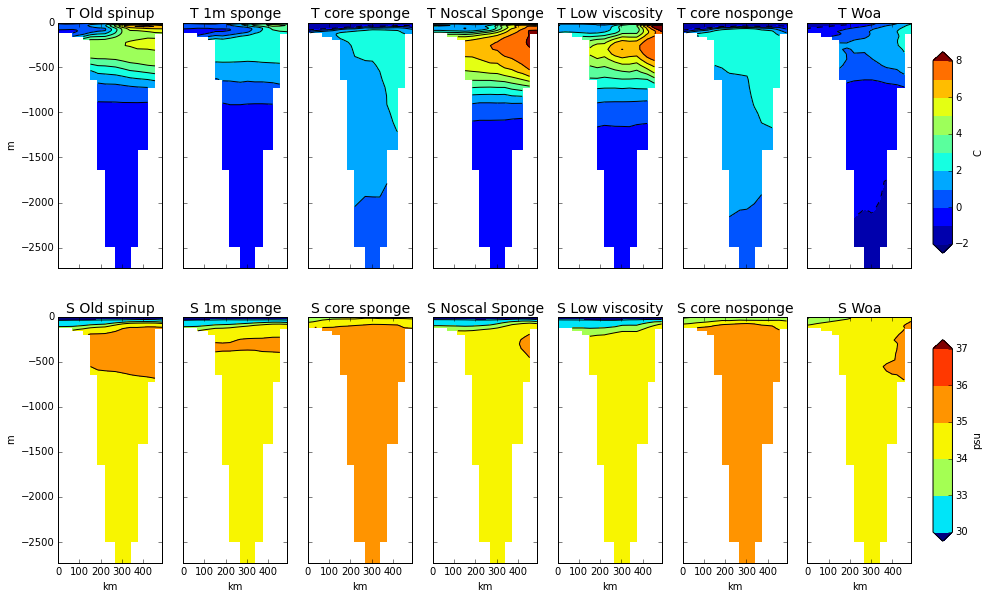

In [115]:
comp_plot(comp_data,fram)

Davis strait

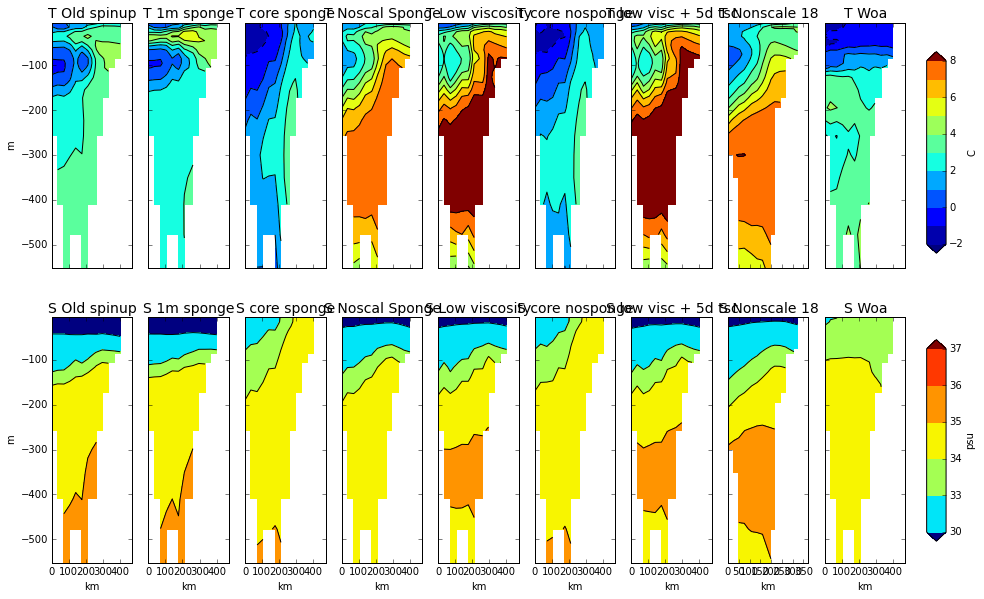

In [47]:
comp_plot(comp_data,davis)

Barents strait

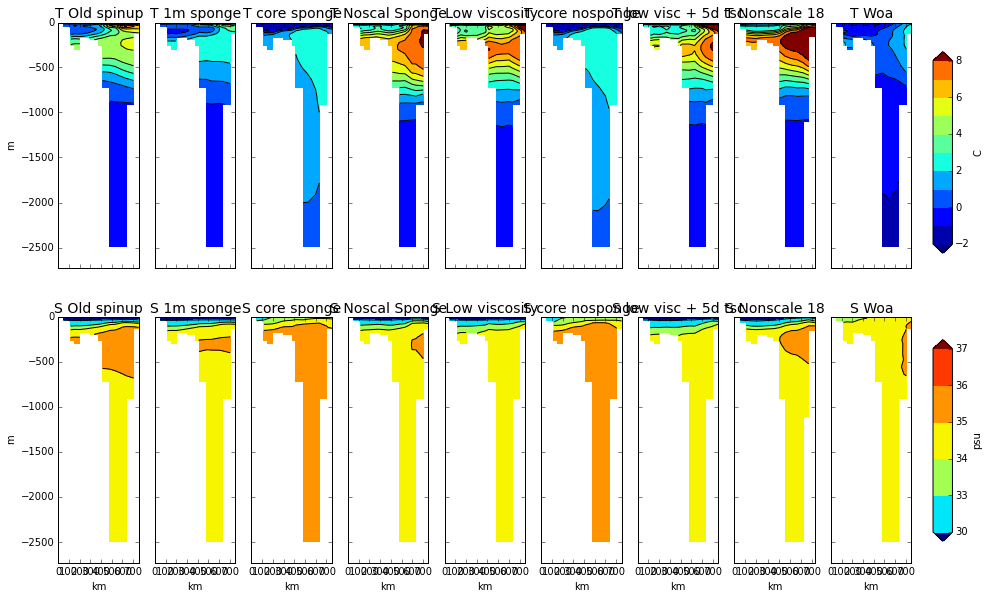

In [48]:
comp_plot(comp_data,barents)

Bering strait

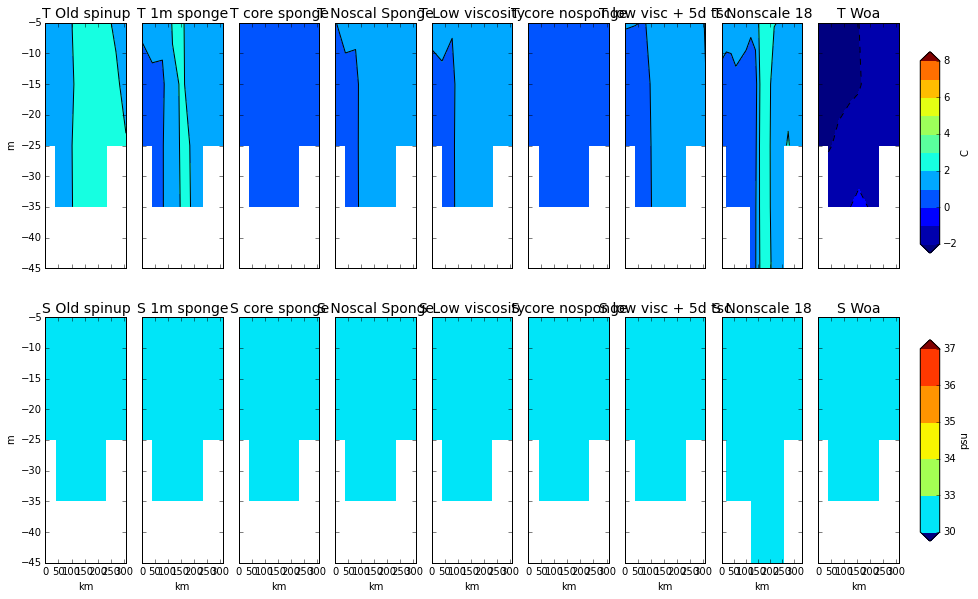

In [49]:
comp_plot(comp_data,bering)

Arctic 1

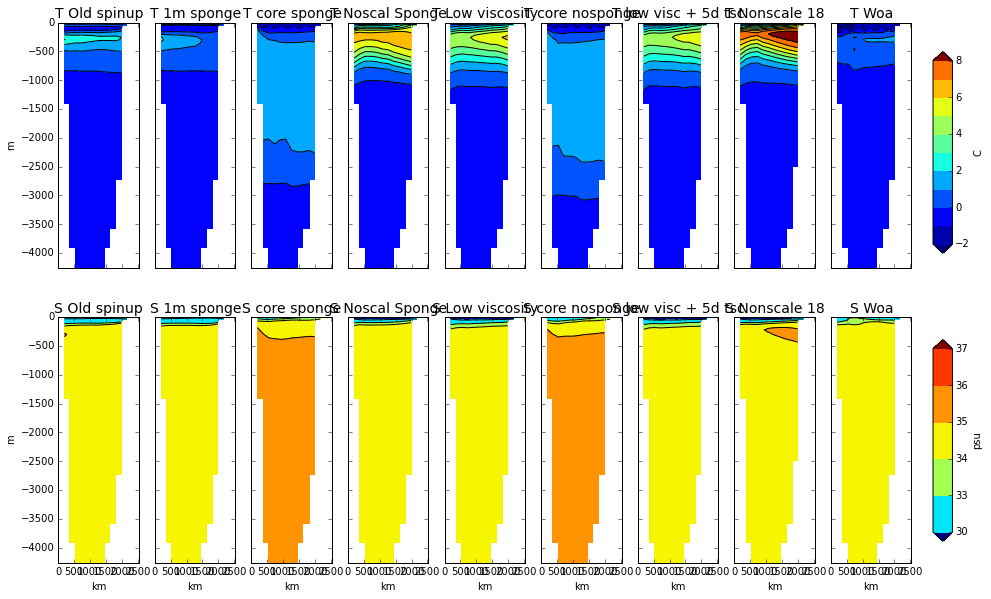

In [50]:
comp_plot(comp_data,arctic1)

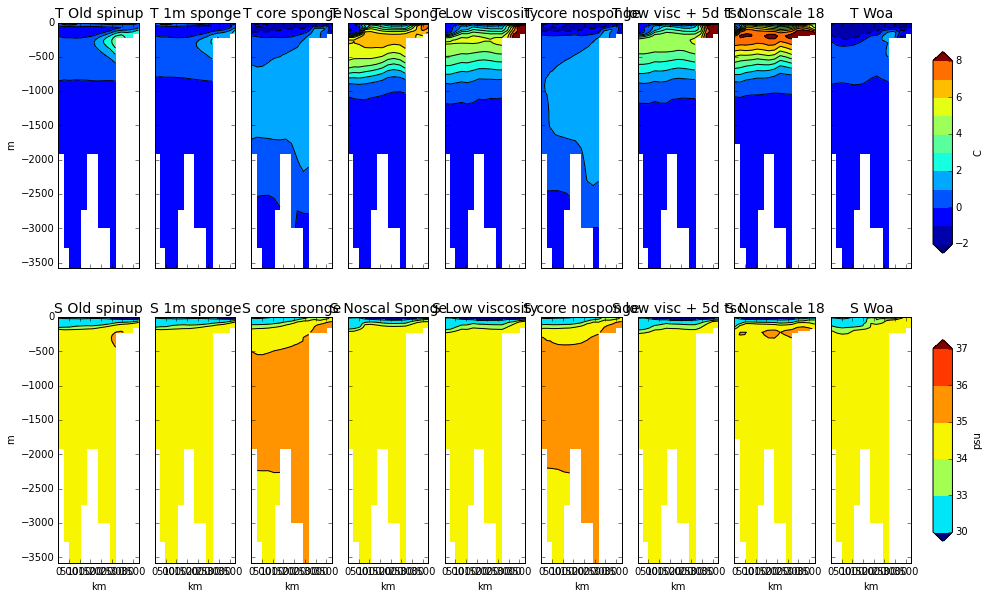

In [51]:
comp_plot(comp_data,arctic2)

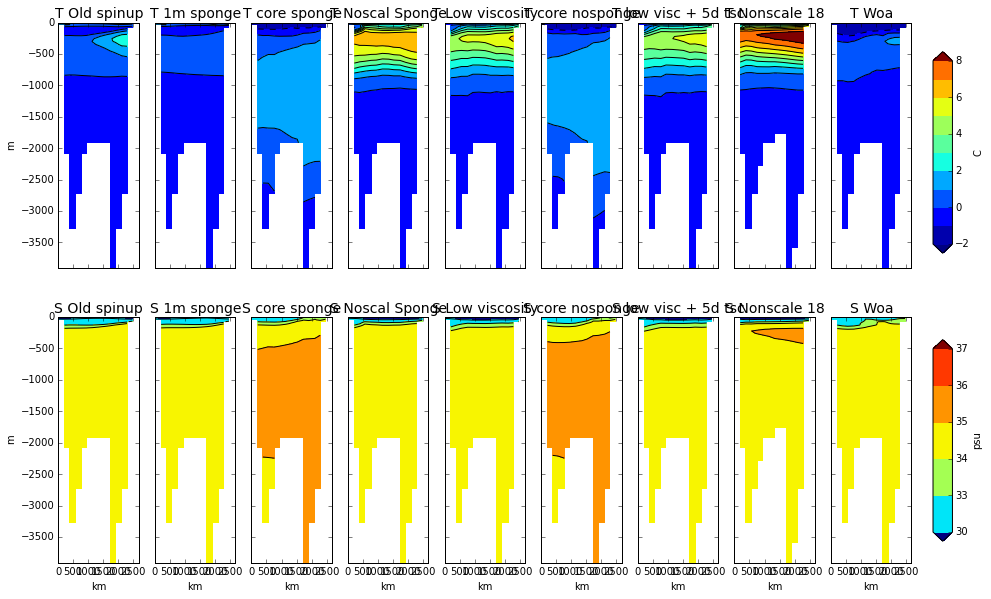

In [52]:
comp_plot(comp_data,arctic3)

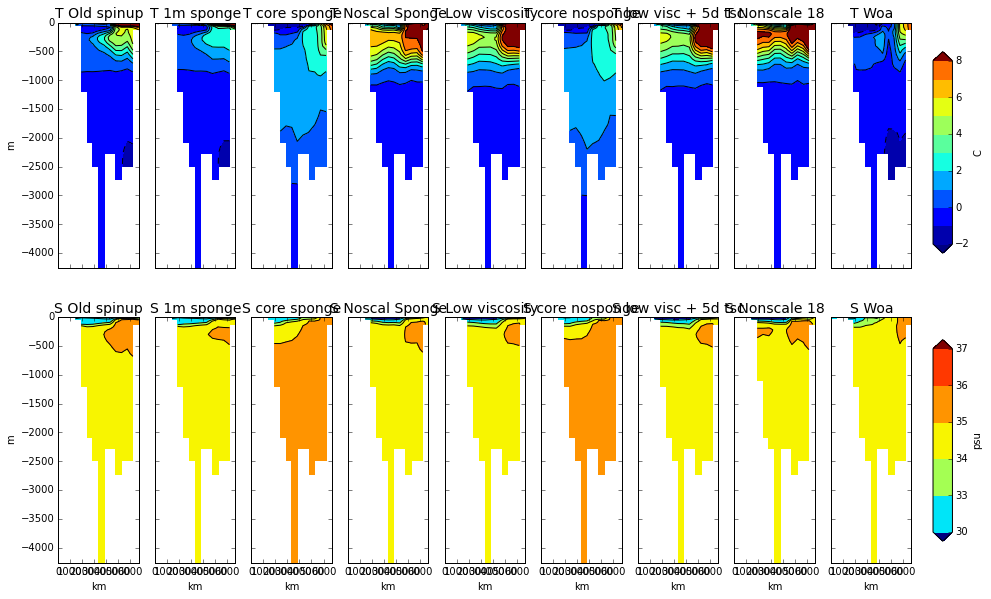

In [53]:
comp_plot(comp_data,arctic4)

In [54]:
liq10,core2,obs = lit_data();
for var in ['Barents','Bering','Fram','Davis']:
    print var
    print 'first ',first_spinup.totalFluxes[var]
    print 'spong ',first_sponge.totalFluxes[var]
    print 'noscal',nonscaled_obcs.totalFluxes[var]
    print 'lw_vis',low_visc_run.totalFluxes[var]
    print '5d_tsc',short_timescale_run.totalFluxes[var]
    print '5d_vis',short_timescale_low_visc_run.totalFluxes[var]
    print 'noice ',noseaice_run.totalFluxes[var]
    print 'nos_18',nonscale_18_run.totalFluxes[var]
    print 'sca_18',scaled_18_run.totalFluxes[var]
    print 'COR_sp',CORE_sponge.totalFluxes[var]
    print 'COR_ns',CORE_nosponge.totalFluxes[var]
    print 'liq10 ',liq10[var]
    print 'Core2 ',core2[var]
    print 'obsv  ',obs[var]

Barents
first  {'Outflow': -0.7, 'Total flow': 0.09, 'Inflow': 0.79}
spong  {'Outflow': -0.77, 'Total flow': -0.05, 'Inflow': 0.72}
noscal {'Outflow': -1.05, 'Total flow': -0.53, 'Inflow': 0.52}
lw_vis {'Outflow': -1.41, 'Total flow': -0.4, 'Inflow': 1.0}
5d_tsc {'Outflow': -0.97, 'Total flow': -0.44, 'Inflow': 0.54}
5d_vis {'Outflow': -1.45, 'Total flow': -0.48, 'Inflow': 0.97}
noice  {'Outflow': -0.87, 'Total flow': -0.08, 'Inflow': 0.8}
nos_18 {'Outflow': -0.94, 'Total flow': -0.47, 'Inflow': 0.47}
sca_18 {'Outflow': -0.83, 'Total flow': -0.03, 'Inflow': 0.8}
COR_sp {'Outflow': -3.23, 'Total flow': 0.09, 'Inflow': 3.31}
COR_ns {'Outflow': -3.22, 'Total flow': -0.32, 'Inflow': 2.9}
liq10  {'Outflow': 4.1, 'Total flow': 2.9, 'Inflow': -1.2}
Core2  {'Outflow': [], 'Total flow': 2.53, 'Inflow': []}
obsv   {'Outflow': 4.1, 'Total flow': '2-2.3', 'Inflow': -1.2}
Bering
first  {'Outflow': -0.03, 'Total flow': 1.23, 'Inflow': 1.26}
spong  {'Outflow': -0.02, 'Total flow': 1.23, 'Inflow': 1.2

Time evolution of the first spin up no sponge at surface

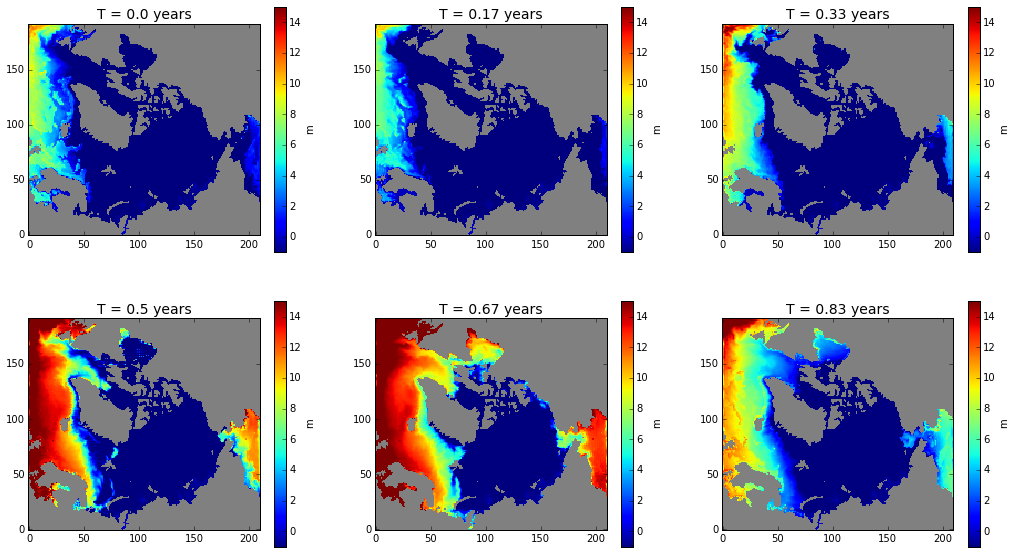

In [56]:
plot_field(first_spinup.data['T'][[0,3,6,9,12,15],0,:,:],first_spinup.years[[0,3,6,9,12,15]],-1,15,matplotlib.cm.jet,'grey','m',row=2,col=3)  

Time evolution of the spin up with sponge at surface

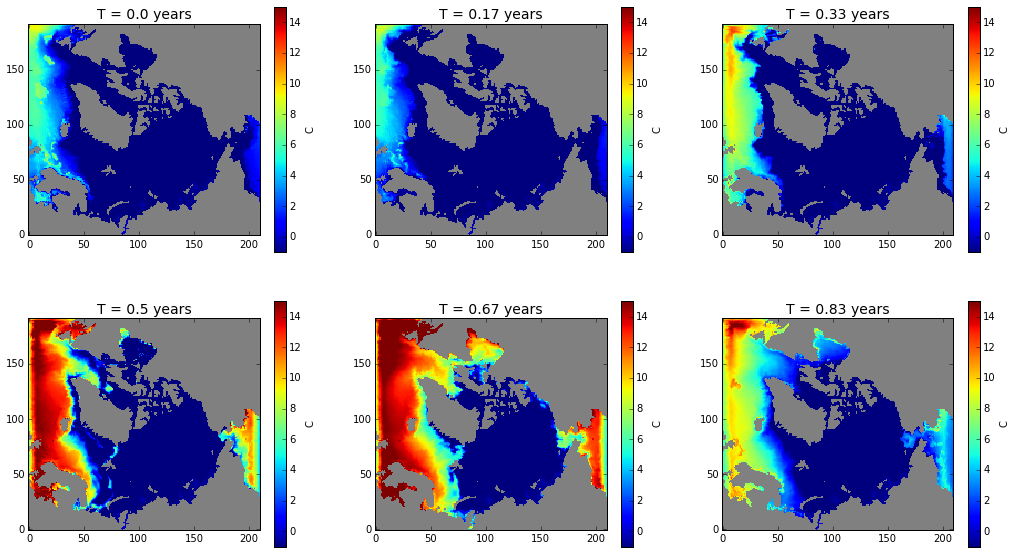

In [57]:
plot_field(first_sponge.data['T'][[0,3,6,9,12,15],0,:,:],first_spinup.years[[0,3,6,9,12,15]],-1,15,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up with sponge and nonscaled OBCS at surface

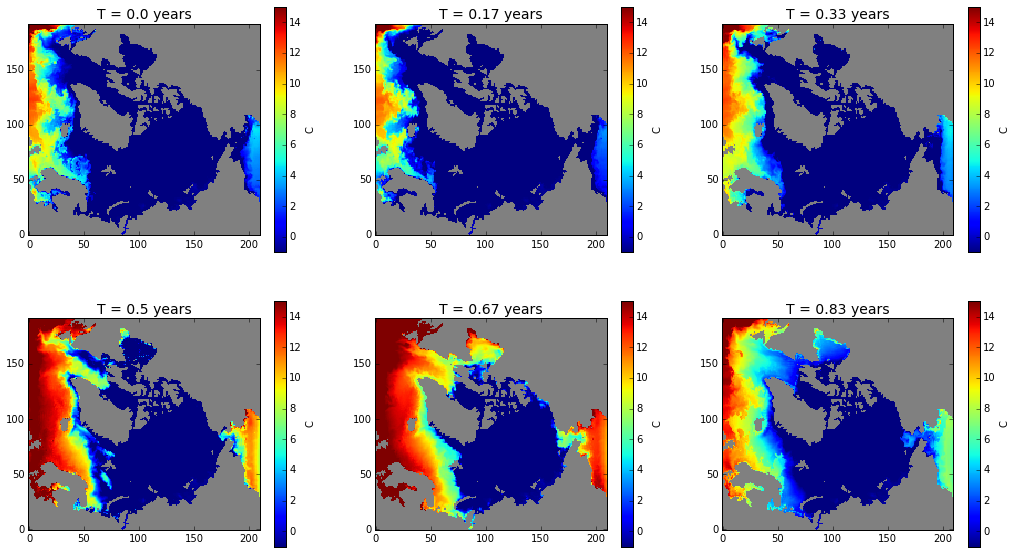

In [58]:
plot_field(nonscaled_obcs.data['T'][[0,3,6,9,12,15],0,:,:],first_spinup.years[[0,3,6,9,12,15]],-1,15,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up with low viscosity

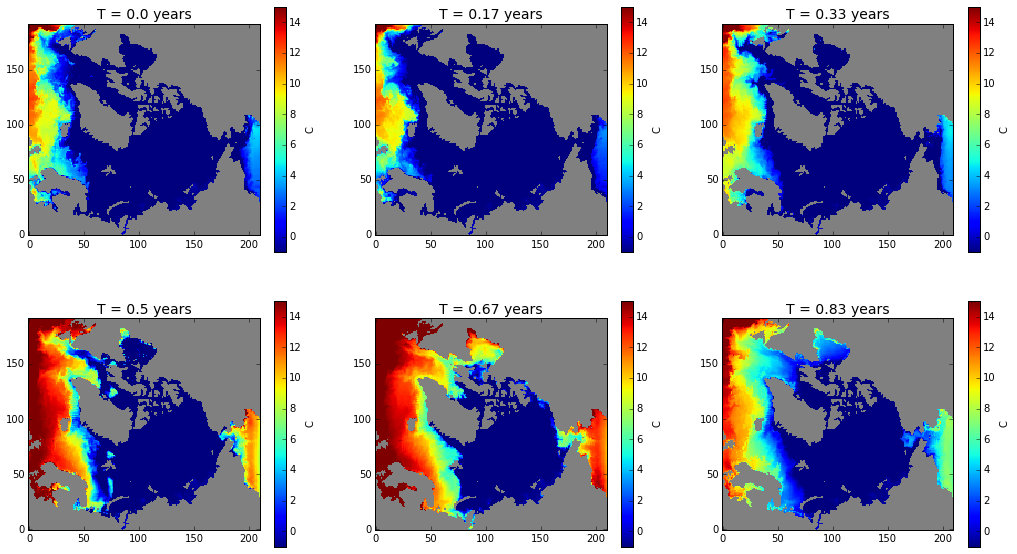

In [60]:
plot_field(low_visc_run.data['T'][[0,3,6,9,12,15],0,:,:],first_spinup.years[[0,3,6,9,12,15]],-1,15,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up with CORE data and no sponge

In [ ]:
plot_field(CORE_nosponge.data['T'][[0,3,6,9,12,15],0,:,:],CORE_nosponge.years[[0,3,6,9,12,15]],-1,15,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up with CORE data and sponge

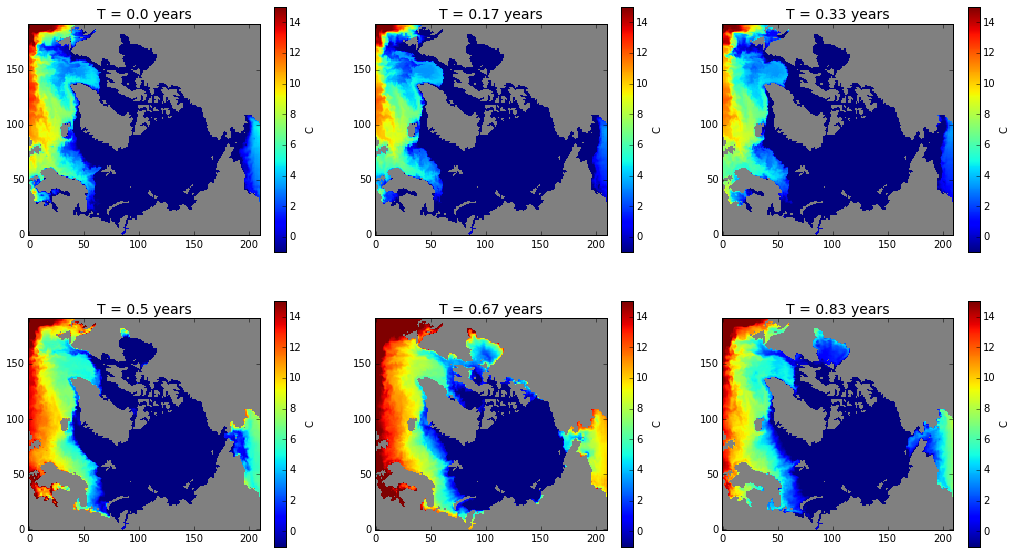

In [116]:
plot_field(CORE_sponge.data['T'][[0,3,6,9,12,15],0,:,:],CORE_sponge.years[[0,3,6,9,12,15]],-1,15,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the first spin up no sponge at 200 m

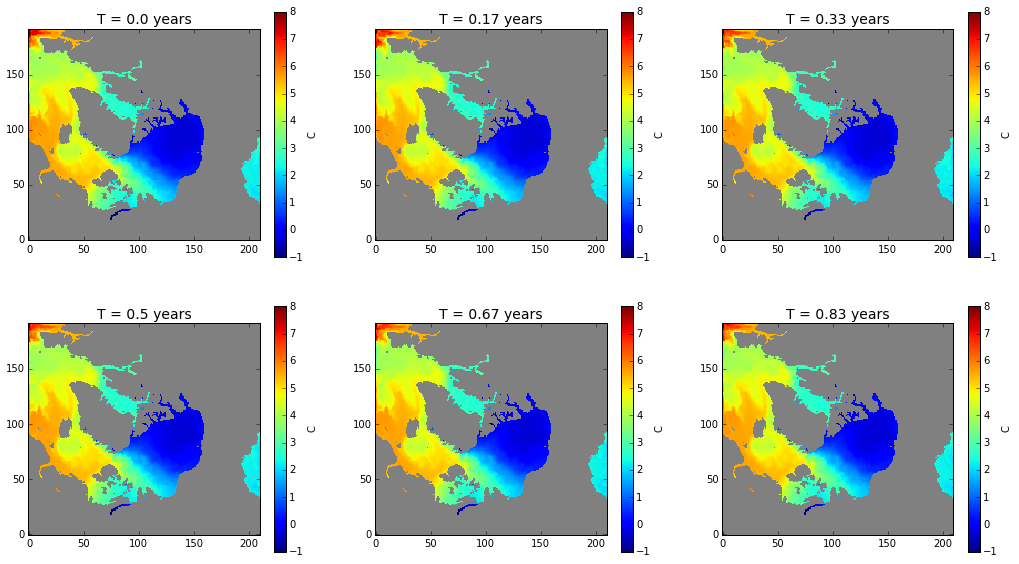

In [62]:
plot_field(first_spinup.data['T'][[0,3,6,9,12,15],16,:,:],first_spinup.years[[0,3,6,9,12,15]],-1,8,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up with sponge at 200 m

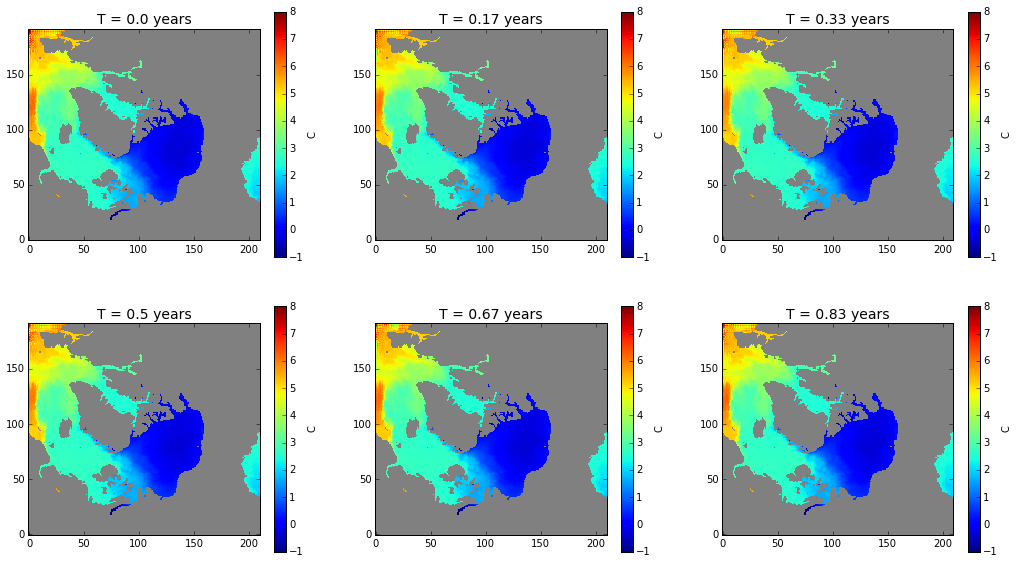

In [63]:
plot_field(first_sponge.data['T'][[0,3,6,9,12,15],16,:,:],first_spinup.years[[0,3,6,9,12,15]],-1,8,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up with sponge and nonscaled OBCS at 200 m

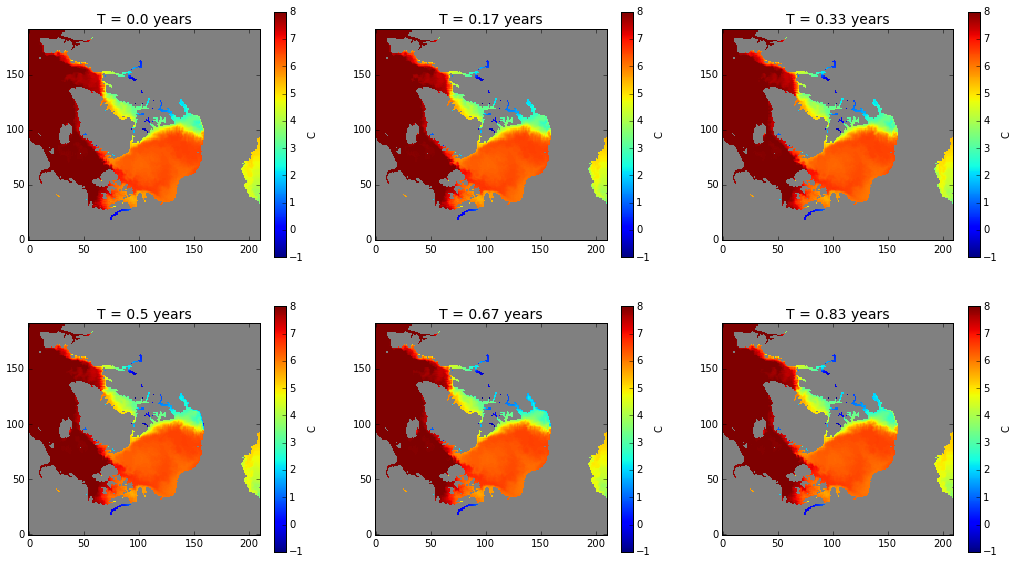

In [64]:
plot_field(nonscaled_obcs.data['T'][[0,3,6,9,12,15],16,:,:],first_spinup.years[[0,3,6,9,12,15]],-1,8,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up with no seaice at 200 m

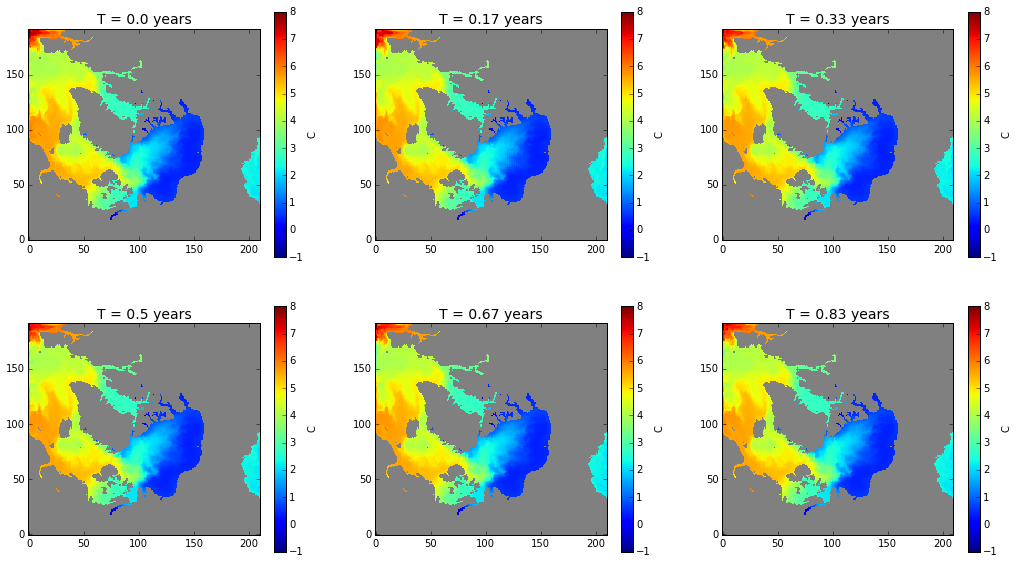

In [65]:
plot_field(noseaice_run.data['T'][[0,3,6,9,12,15],16,:,:],first_spinup.years[[0,3,6,9,12,15]],-1,8,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up with low visco at 200 m

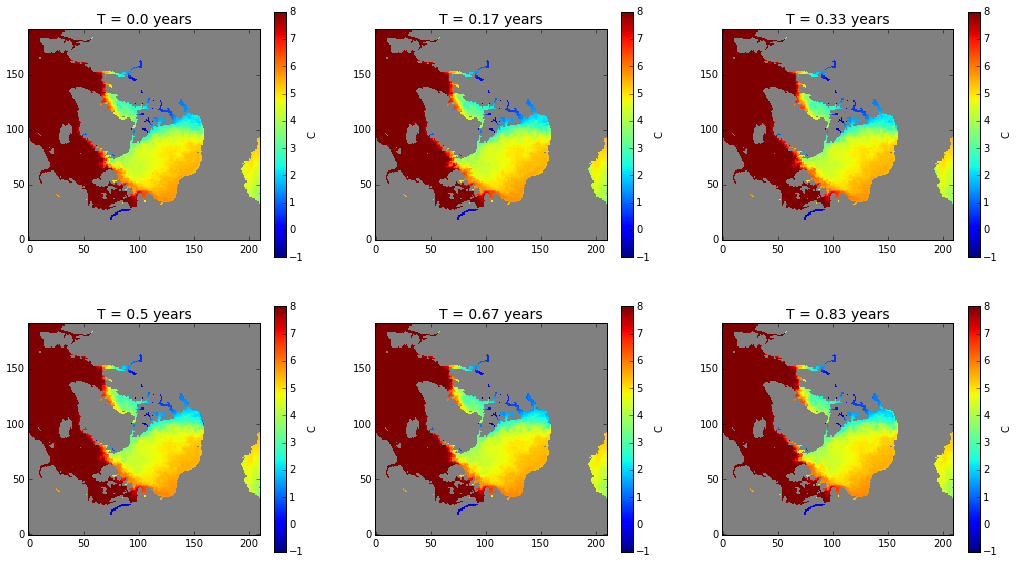

In [66]:
plot_field(low_visc_run.data['T'][[0,3,6,9,12,15],16,:,:],first_spinup.years[[0,3,6,9,12,15]],-1,8,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up with 5d timescale at 200 m

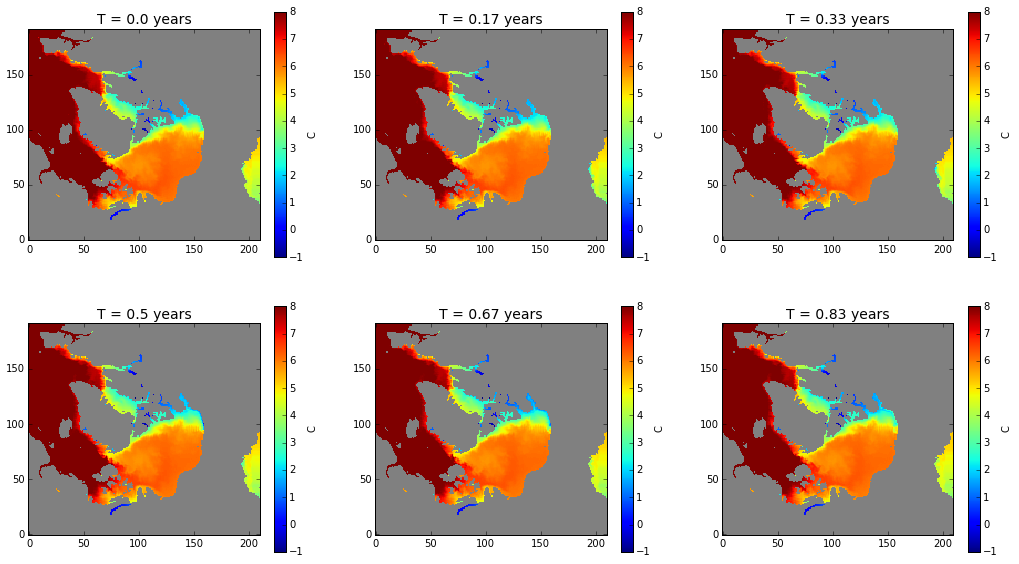

In [67]:
plot_field(short_timescale_run.data['T'][[0,3,6,9,12,15],16,:,:],first_spinup.years[[0,3,6,9,12,15]],-1,8,matplotlib.cm.jet,'grey','C',row=2,col=3)  

In [ ]:
Time evolution of the spin up with CORE forcing and no sponge at 200 m

In [ ]:
plot_field(CORE_nosponge.data['T'][[0,3,6,9,12,15],16,:,:],CORE_nosponge.years[[0,3,6,9,12,15]],-1,8,matplotlib.cm.jet,'grey','C',row=2,col=3)  

In [ ]:
Time evolution of the spin up with CORE forcing and 1m sponge at 200 m

In [ ]:
plot_field(CORE_sponge.data['T'][[0,3,6,9,12,15],16,:,:],CORE_sponge.years[[0,3,6,9,12,15]],-1,8,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the first spin up no sponge Mixdel layer depth

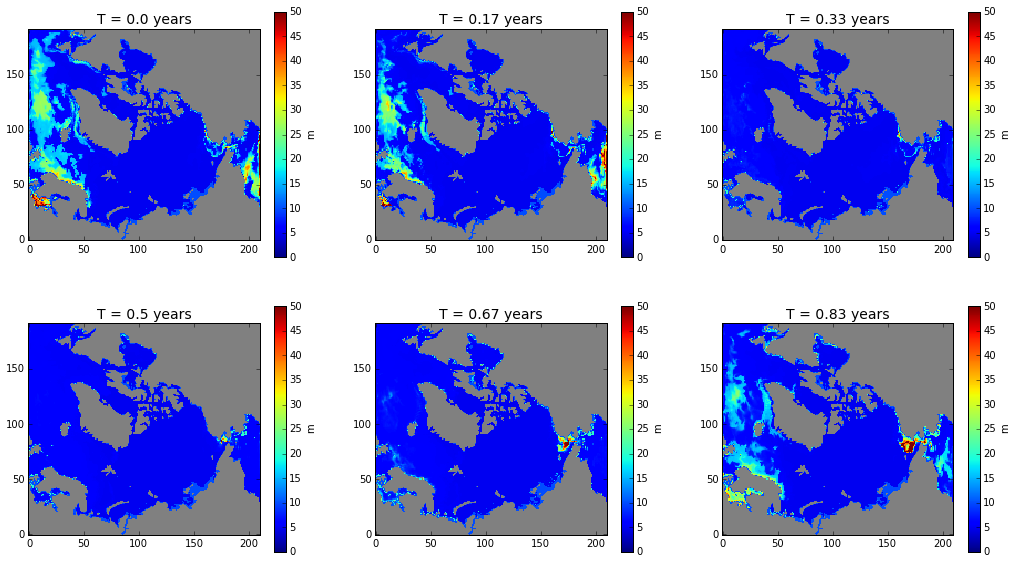

In [68]:
plot_field(first_spinup.mxldepth[[0,2,4,6,8,10],0,:,:],first_spinup.years[[0,3,6,9,12,15]],0,50,matplotlib.cm.jet,'grey','m',row=2,col=3)  

Time evolution of the spin up with sponge layer depth

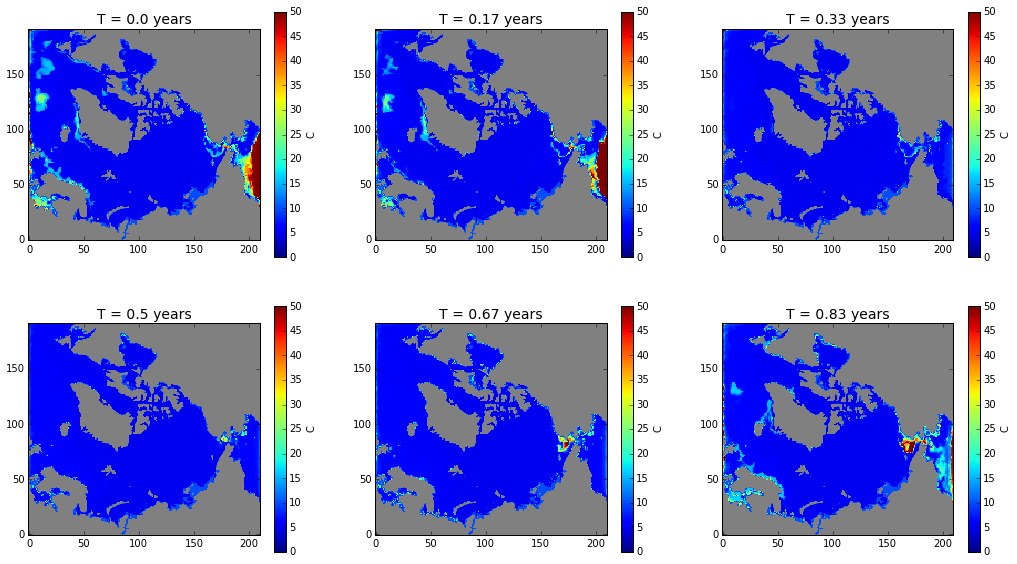

In [69]:
plot_field(first_sponge.mxldepth[[0,2,4,6,8,10],0,:,:],first_spinup.years[[0,3,6,9,12,15]],0,50,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up with sponge and nonscaled OBCS at 200 m

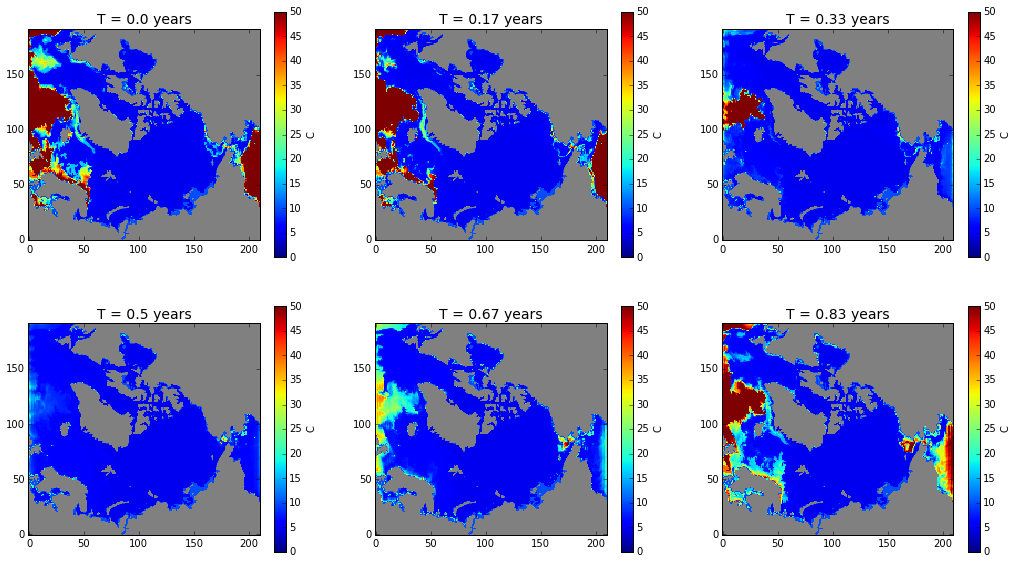

In [70]:
plot_field(nonscaled_obcs.mxldepth[[0,2,4,6,8,10],0,:,:],first_spinup.years[[0,3,6,9,12,15]],0,50,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up with no seaice Mixdel layer depth

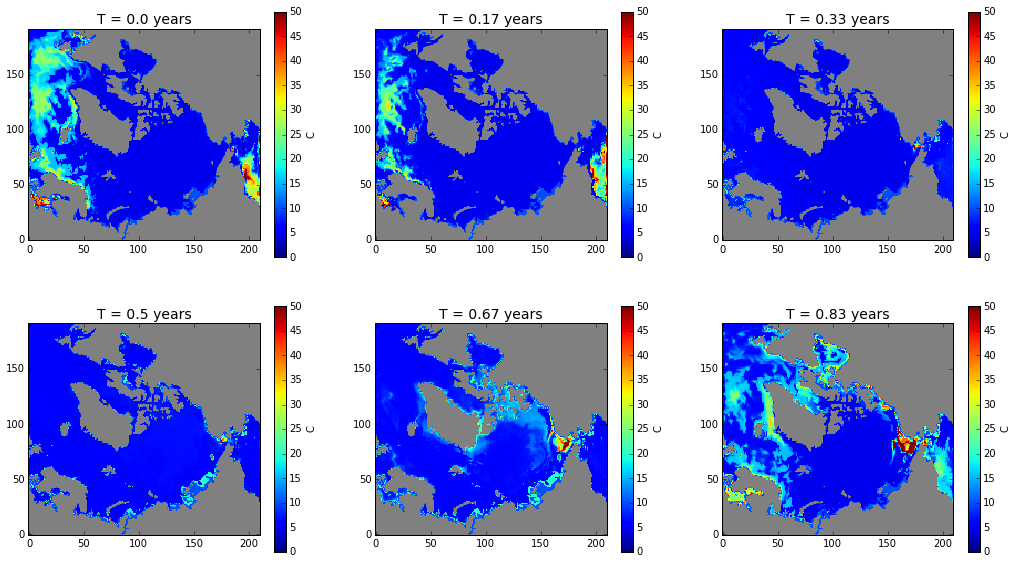

In [71]:
plot_field(noseaice_run.mxldepth[[0,2,4,6,8,10],0,:,:],first_spinup.years[[0,3,6,9,12,15]],0,50,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up with low visco Mixdel layer depth

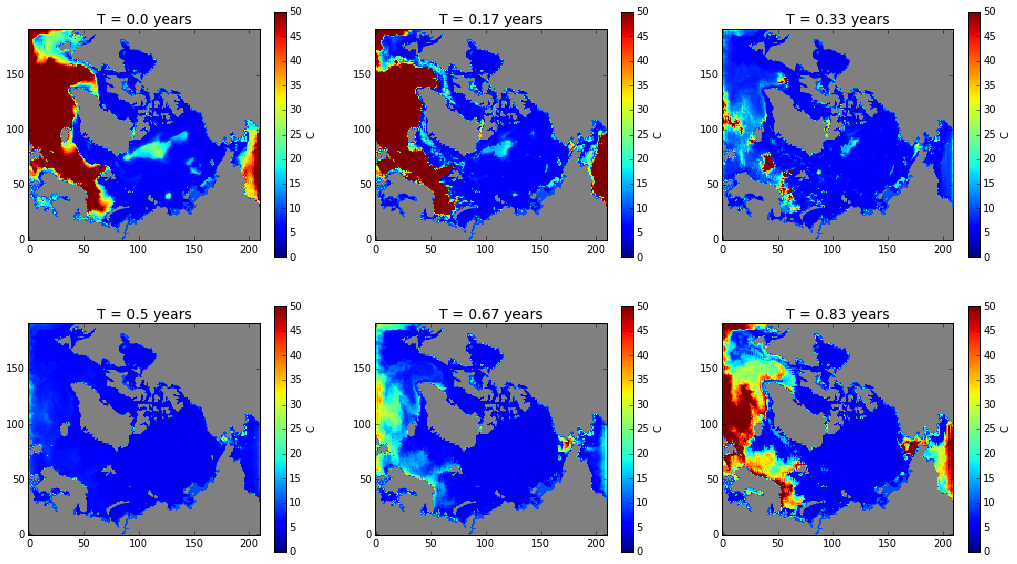

In [72]:
plot_field(low_visc_run.mxldepth[[0,2,4,6,8,10],0,:,:],first_spinup.years[[0,3,6,9,12,15]],0,50,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up with 5d timescle Mixdel layer depth

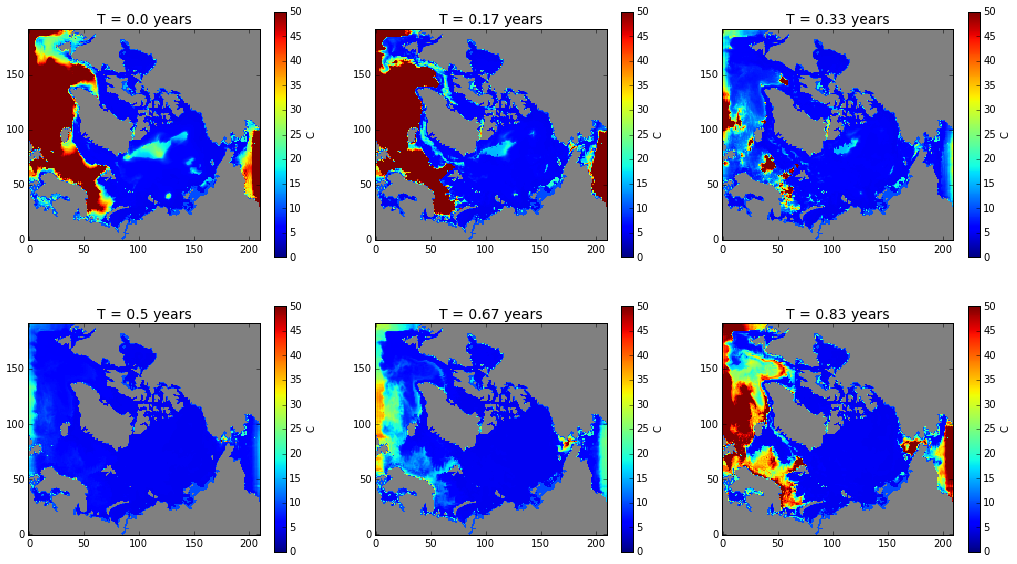

In [73]:
plot_field(short_timescale_run.mxldepth[[0,2,4,6,8,10],0,:,:],first_spinup.years[[0,3,6,9,12,15]],0,50,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up CORE and sponge timescle Mixdel layer depth

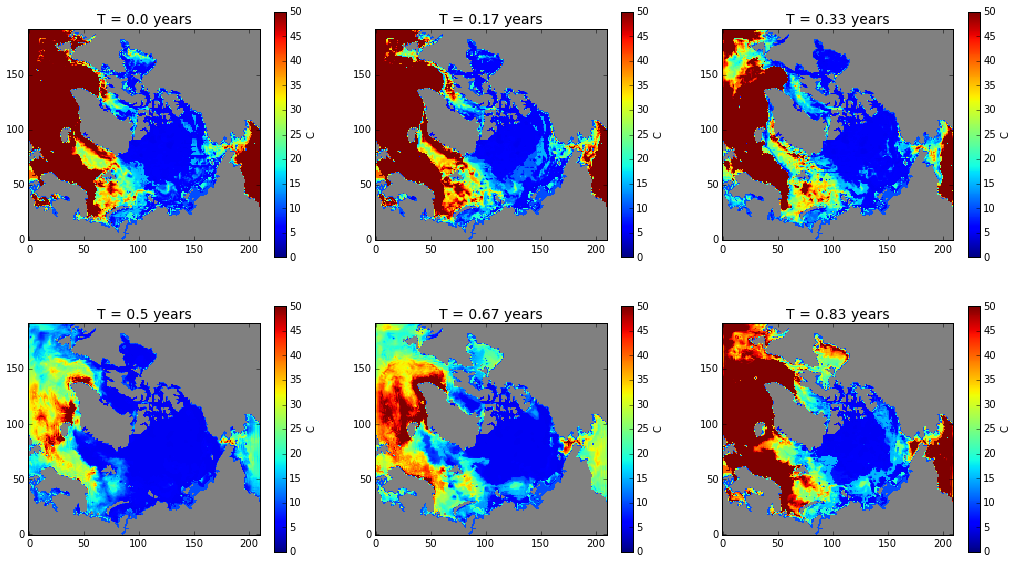

In [74]:
plot_field(CORE_sponge.mxldepth[[0,2,4,6,8,10],0,:,:],CORE_sponge.years[[0,3,6,9,12,15]],0,300,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up CORE and no sponge timescle Mixdel layer depth

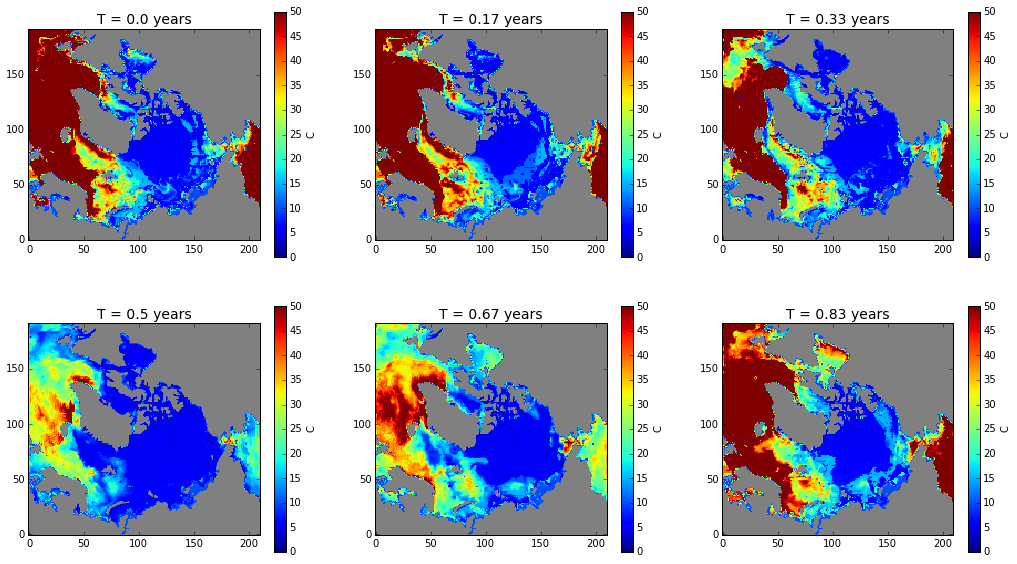

In [75]:
plot_field(CORE_nosponge.mxldepth[[0,2,4,6,8,10],0,:,:],CORE_nosponge.years[[0,3,6,9,12,15]],0,300,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the first spin up no sponge seice extent

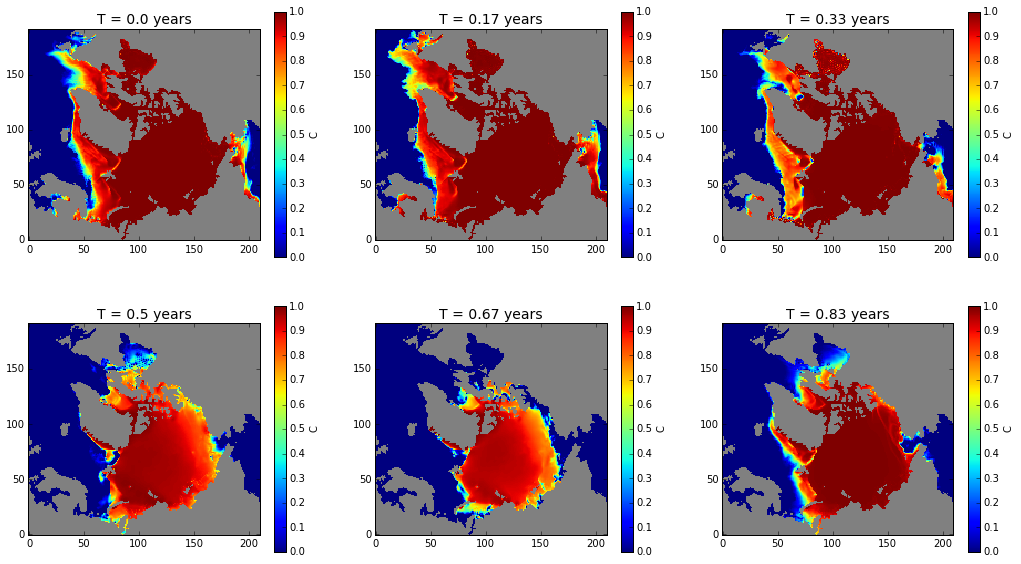

In [76]:
plot_field(first_spinup.seaice['SIarea'][[0,2,4,6,8,10],0,:,:],first_spinup.years[[0,3,6,9,12,15]],0,1,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up with sponge layer depth

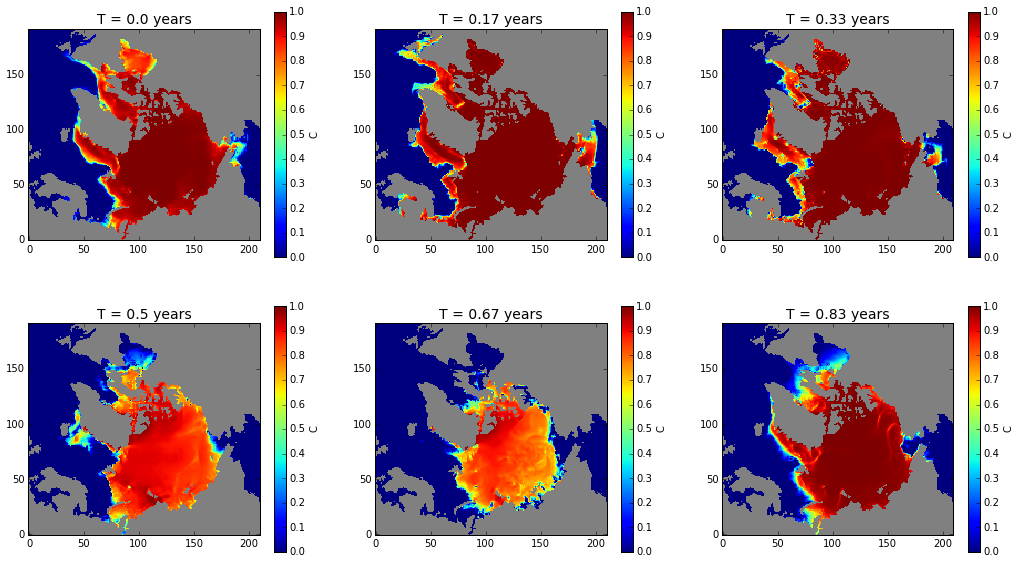

In [77]:
plot_field(first_sponge.seaice['SIarea'][[0,2,4,6,8,10],0,:,:],first_spinup.years[[0,3,6,9,12,15]],0,1,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up with sponge and nonscaled OBCS at 200 m

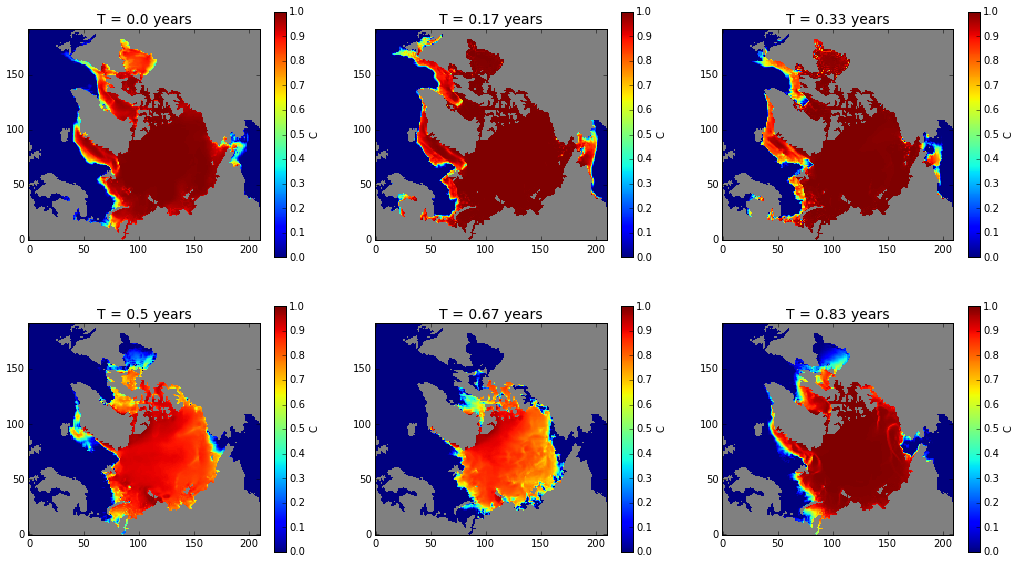

In [78]:
plot_field(nonscaled_obcs.seaice['SIarea'][[0,2,4,6,8,10],0,:,:],first_spinup.years[[0,3,6,9,12,15]],0,1,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Temperatures in the experiments at surface

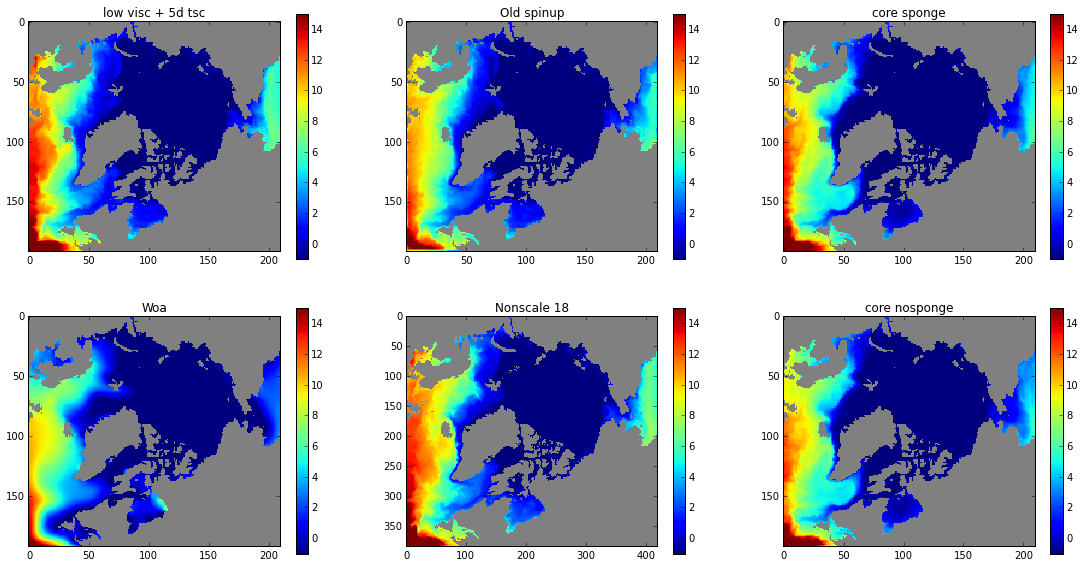

In [79]:
def plot_tot(comp):
    fig,axes = plt.subplots(2,3)
    vimin = -1
    vimax = 15
    ind = 0
    for ax in axes.flat:
        ax.set_title(comp[ind].title)
        masked_array = np.ma.array(comp[ind].T[0,:,:], mask=np.isnan(comp[ind].T[0,:,:]))
        cmap= matplotlib.cm.jet
        cmap.set_bad('grey',1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        cbar = fig.colorbar(ca,ax=ax )
        ind +=1
        fig.subplots_adjust(right=2.6,top=2.)
comp= {0 : short_timescale_low_visc_run , 1 : nonscaled_obcs , \
            1 : first_spinup , 2 : CORE_sponge , 3 : woa ,
      4 : nonscale_18_run , 5 : CORE_nosponge}
plot_tot(comp)

Temperatures in the experiments at 200 m

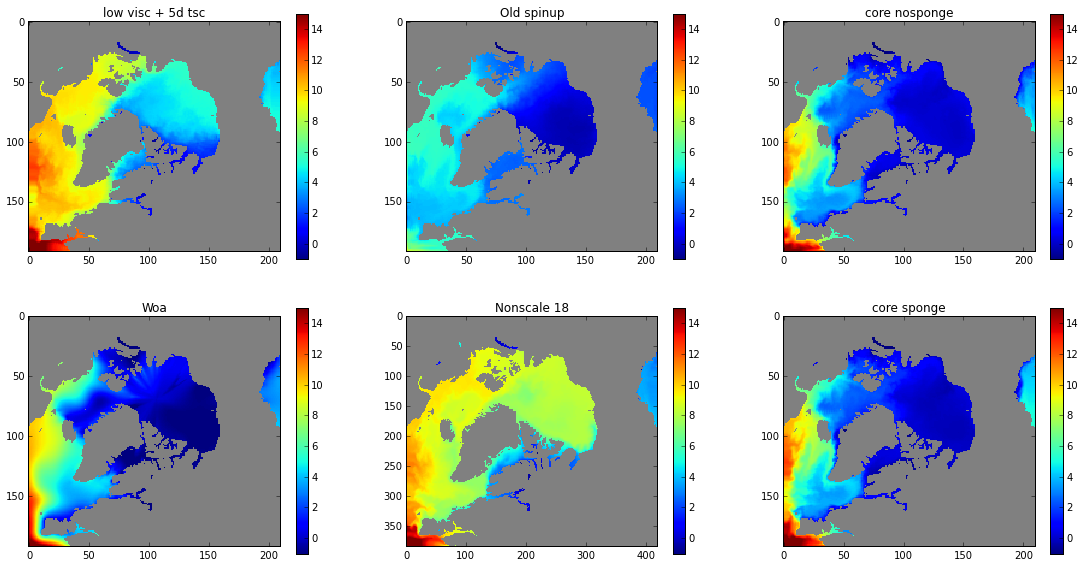

In [80]:
def plot_tot(comp):
    fig,axes = plt.subplots(2,3)
    vimin = -1
    vimax = 15
    ind = 0
    for ax in axes.flat:
        ax.set_title(comp[ind].title)
        masked_array = np.ma.array(comp[ind].T[16,:,:], mask=np.isnan(comp[ind].T[16,:,:]))
        cmap= matplotlib.cm.jet
        cmap.set_bad('grey',1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        cbar = fig.colorbar(ca,ax=ax )
        ind +=1
        fig.subplots_adjust(right=2.6,top=2.)
comp= {0 : short_timescale_low_visc_run , 1 : nonscaled_obcs , \
            1 : first_spinup , 2 : CORE_nosponge , 3 : woa ,
      4 : nonscale_18_run , 5 : CORE_sponge}
plot_tot(comp)

Salinity in the experimets at surface

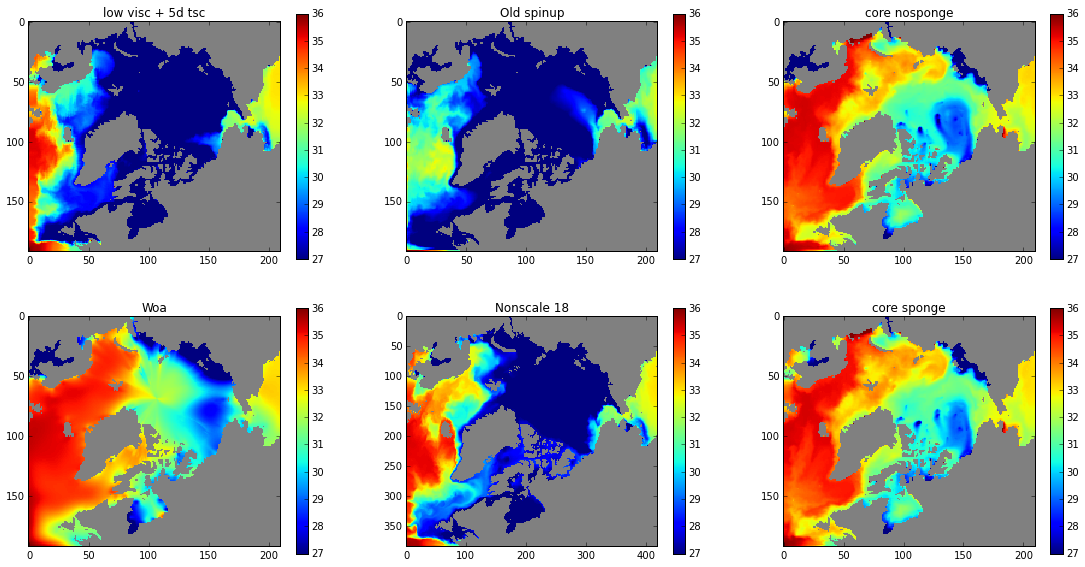

In [81]:
def plot_tot(comp):
    fig,axes = plt.subplots(2,3)
    vimin = 27
    vimax = 36
    ind = 0
    for ax in axes.flat:
        ax.set_title(comp[ind].title)
        masked_array = np.ma.array(comp[ind].S[0,:,:], mask=np.isnan(comp[ind].S[0,:,:]))
        cmap= matplotlib.cm.jet
        cmap.set_bad('grey',1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        cbar = fig.colorbar(ca,ax=ax )
        ind +=1
        fig.subplots_adjust(right=2.6,top=2.)
comp= {0 : short_timescale_low_visc_run , 1 : nonscaled_obcs , \
            1 : first_spinup , 2 : CORE_nosponge , 3 : woa ,
      4 : nonscale_18_run , 5 : CORE_sponge}
plot_tot(comp)

Seaice of experiments

AttributeError: StateRead instance has no attribute 'seaice'

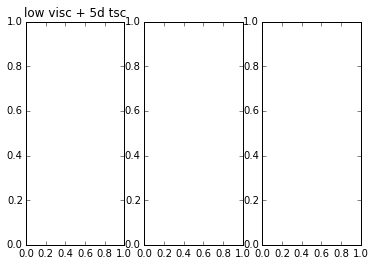

In [82]:
def plot_tot(comp):
    fig,axes = plt.subplots(1,4)
    vimin = 0
    vimax = 1
    ind = 0
    for ax in axes.flat:
        ax.set_title(comp[ind].title)
        masked_array = np.ma.array(np.nanmean(comp[ind].seaice['SIarea'][:,0,:,:],axis=0), mask=np.isnan(comp[ind].seaice['SIarea'][0,0,:,:]))
        cmap= matplotlib.cm.jet
        cmap.set_bad('grey',1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        cbar = fig.colorbar(ca,ax=ax )
        ind +=1
        fig.subplots_adjust(right=2.5,top=1.)
comp= { 0 : nonscaled_obcs , 1 : first_sponge , 2 : CORE_nosponge , 3 : CORE_sponge}
plot_tot(comp)

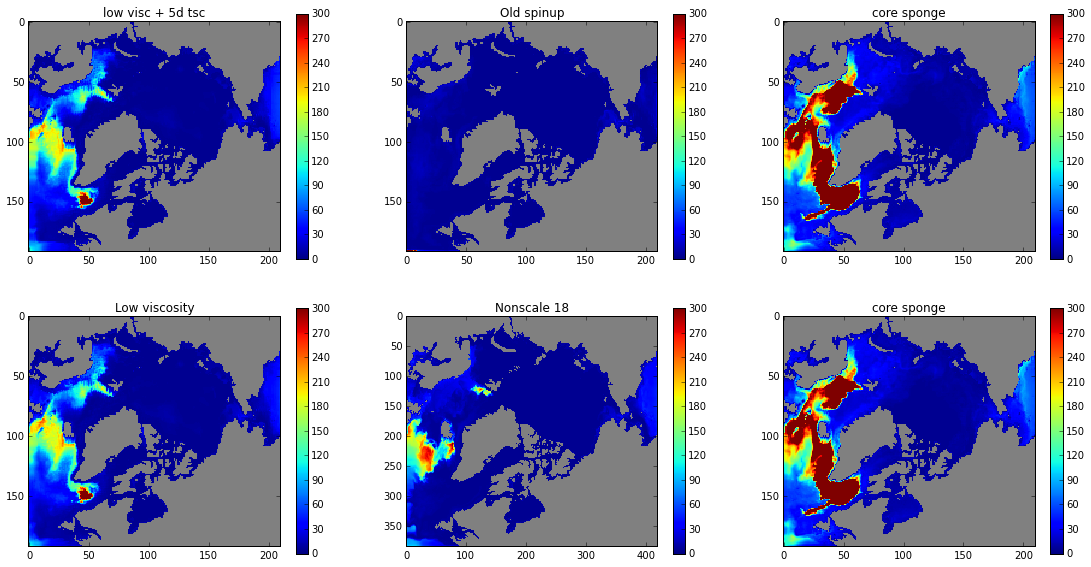

In [83]:
def plot_tot(comp):
    fig,axes = plt.subplots(2,3)
    vimin = 0
    vimax = 300
    ind = 0
    for ax in axes.flat:
        ax.set_title(comp[ind].title)
        masked_array = np.ma.array(np.nanmean(comp[ind].mxldepth[:,0,:,:],axis=0), mask = np.isnan(np.nanmean(comp[ind].mxldepth[:,0,:,:],axis=0)))
        cmap= matplotlib.cm.jet
        cmap.set_bad('grey',1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        cbar = fig.colorbar(ca,ax=ax )
        ind +=1
        fig.subplots_adjust(right=2.6,top=2.)
comp= {0 : short_timescale_low_visc_run , 1 : nonscaled_obcs , \
            1 : first_spinup , 2 : CORE_sponge , 3 : low_visc_run ,
      4 : nonscale_18_run , 5 : CORE_sponge}
plot_tot(comp)

The density ρ of each box is given by ρ = ρ0 [1 − α(T −T0) + β (S −S0)]
(13)
where ρ0 = 1027.5 kgm−3 is a reference density, T0 = 5oC is a reference temperature, α = 0.0002 oC−1 and β = 0.0008 psu−1.
The

In [84]:
run_sponge_5d = MonitorRead()
run_sponge_5d.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_5d_tsc/results/',[0])
run_sponge_5d.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_5d_tsc/results/',[0])
run_sponge_5d.title('sponge 5d timescale scaled obcs','brown')

run_sponge_visco = MonitorRead()
run_sponge_visco.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_viscosity/results/',[0])
run_sponge_visco.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_viscosity/results/',[0])
run_sponge_visco.title('sponge low visco timescale','orange')

run_sponge_visco_5d = MonitorRead()
run_sponge_visco_5d.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_visc+5d/results/',[0])
run_sponge_visco_5d.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_viscosity/results/',[0])
run_sponge_visco_5d.title('sponge low visco 5d tsc','magenta')

In [85]:
run_36km = MonitorRead()
run_36km.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',[0,518400,1036800,1555200,2073600,2592000])
run_36km.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',[0,518400,1036800,1555200,2073600,2592000])
#run_ERA_tempcorr0.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',[0,518400,1036800,1555200,2073600,2592000,3110400,3628800,4147200,4665600,5184000,5702400,6220800,6739200,7257600,7776000,8294400,8812800])
run_36km.title('no sponge','blue')

run_sponge = MonitorRead()
run_sponge.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results/',[0,777600,1555200,2332800])
run_sponge.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results/',[0,777600,1555200,2332800])
run_sponge.title('sponge 1m timescale scaled obcs','red')

run_sponge_noscaled = MonitorRead()
run_sponge_noscaled.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_noscaled/results/',[0,777600])
run_sponge_noscaled.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_noscaled/results/',[0,777600,])
run_sponge_noscaled.title('sponge 1m timescale noscaled obcs','purple')

run_sponge_timescale = MonitorRead()
run_sponge_timescale.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_timescale/results/',[0])
run_sponge_timescale.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_timescale/results/',[0])
run_sponge_timescale.title('sponge 1y timescale scaled obcs','black')

run_noice = MonitorRead()
run_noice.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_noice/results/',[0,777600])
run_noice.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_noice/results/',[0,777600])
run_noice.title('no seaice','green')

In [86]:
run_CORE_noobcs = MonitorRead()
run_CORE_noobcs.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE/results1/',[0])
run_CORE_noobcs.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE/results1/',[0])
run_CORE_noobcs.title('core','blue')

run_CORE = MonitorRead()
run_CORE.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE/results/',[0])
#run_CORE.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE/results/',[0])
run_CORE.title('core','black')

In [87]:
run_CORE_sponge = MonitorRead()
run_CORE_sponge.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_sponge/results/',[0,777600,1555200,2332800])
run_CORE_sponge.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_sponge/results/',[0,777600,1555200,2332800])
run_CORE_sponge.title('core','yellow')

run_CORE_nosponge = MonitorRead()
run_CORE_nosponge.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_nosponge/results/',[0,777600,1555200,2332800])
run_CORE_nosponge.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_nosponge/results/',[0,777600,1555200,2332800])
run_CORE_nosponge.title('core','orange')

In [89]:
run_18_nonscale = MonitorRead()
run_18_nonscale.readData('/hpcdata/scratch/am8e13/arctic420x384/run_sponge_noscale/results/',[0,466560,933120])
run_18_nonscale.readDynStDiag('/hpcdata/scratch/am8e13/arctic420x384/run_sponge_noscale/results/',[0,466560,933120])
run_18_nonscale.title('nonscale 18 sponge','grey')

run_18_scaled = MonitorRead()
run_18_scaled.readData('/hpcdata/scratch/am8e13/arctic420x384/run_sponge_scaled/results/',[0,466560,933120])
run_18_scaled.readDynStDiag('/hpcdata/scratch/am8e13/arctic420x384/run_sponge_scaled/results/',[0,466560,933120])
run_18_scaled.title('scaled 18 sponge','violet')

In [90]:
mon = { 'run_36km' : run_36km , 'run_sponge' : run_sponge , 'run_CORE' : run_CORE, \
       'run_CORE_noobcs' : run_CORE_noobcs ,\
       'run_sponge_visco_5d' : run_sponge_visco_5d , 'run_18_nonscale' : run_18_nonscale ,
                'run_18_scaled' : run_18_scaled , 'run_ERA_noobcs' : run_ERA_noobcs,
      'run_CORE_nosponge' : run_CORE_nosponge , 'run_CORE_sponge' : run_CORE_sponge}


era obcs red
core black
core blue
nonscale 18 sponge grey
core orange
scaled 18 sponge violet
sponge low visco 5d tsc magenta
core yellow


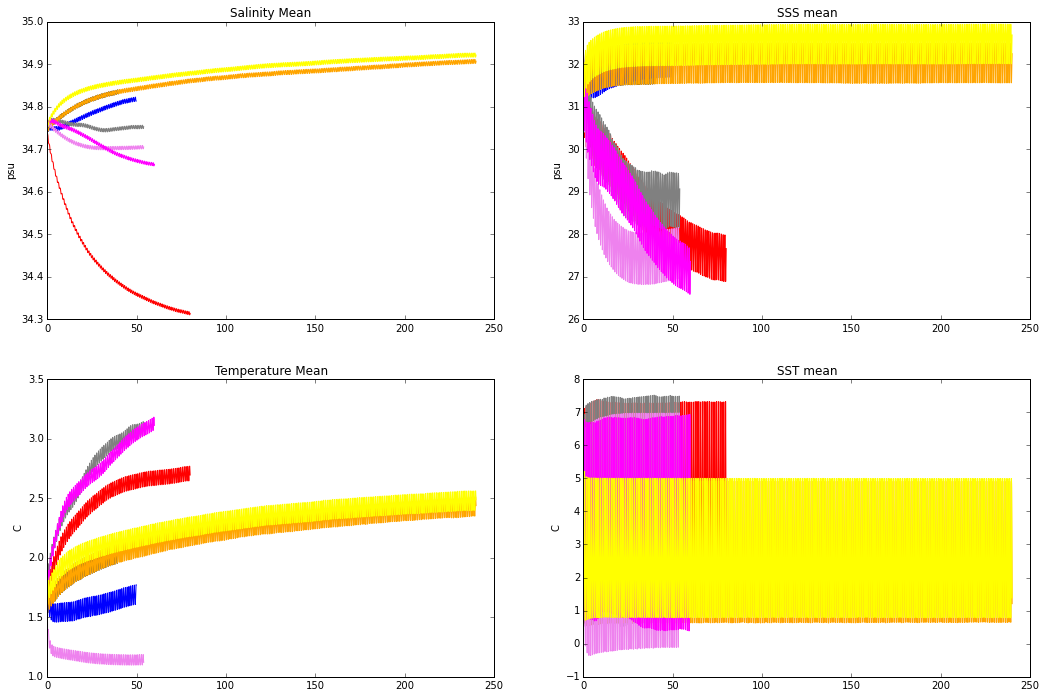

In [92]:
plot_monitor(mon,['salt_mean','sss_mean','theta_mean','sst_mean'])

era obcs red
core black
core blue
nonscale 18 sponge grey
core orange
scaled 18 sponge violet
sponge low visco 5d tsc magenta
core yellow


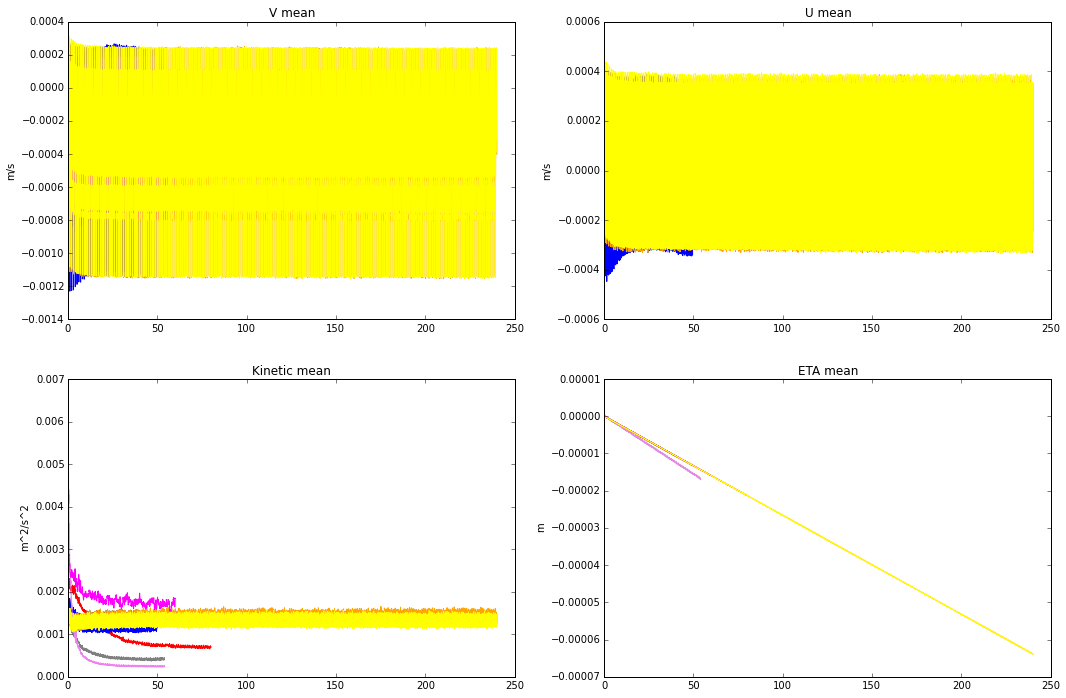

In [93]:
plot_monitor(mon,['vvel_mean','uvel_mean','ke_mean','eta_mean'])

era obcs red
core black
core blue
nonscale 18 sponge grey
core orange
scaled 18 sponge violet
sponge low visco 5d tsc magenta
core yellow


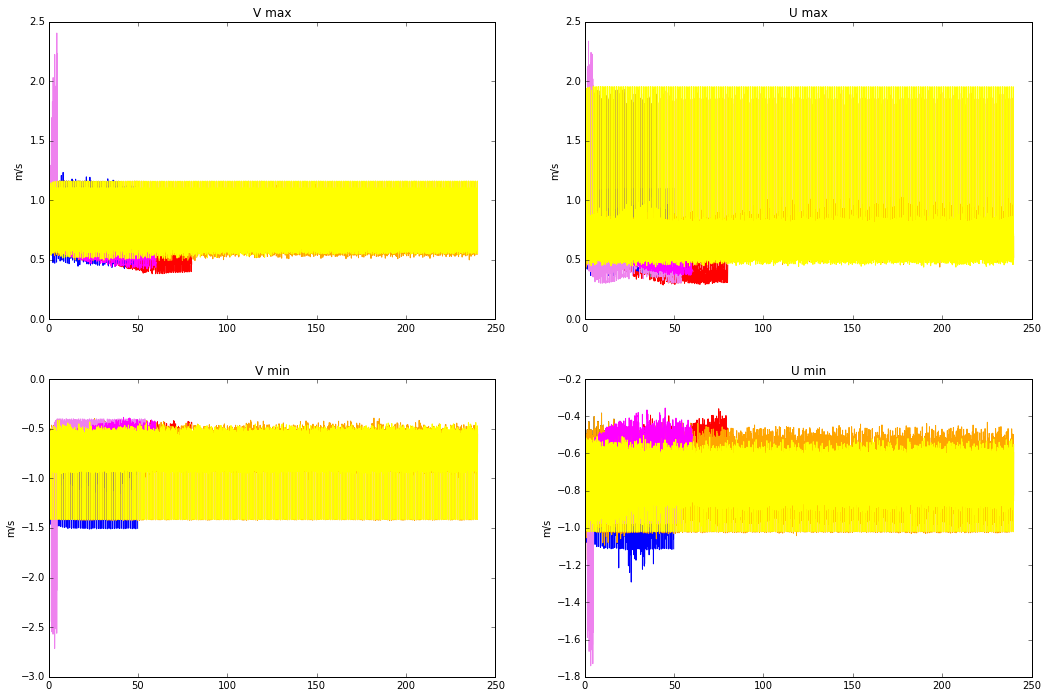

In [94]:
plot_monitor(mon,['vvel_max','uvel_max','vvel_min','uvel_min'])

era obcs red
core black
core blue
nonscale 18 sponge grey
core orange
scaled 18 sponge violet
sponge low visco 5d tsc magenta
core yellow


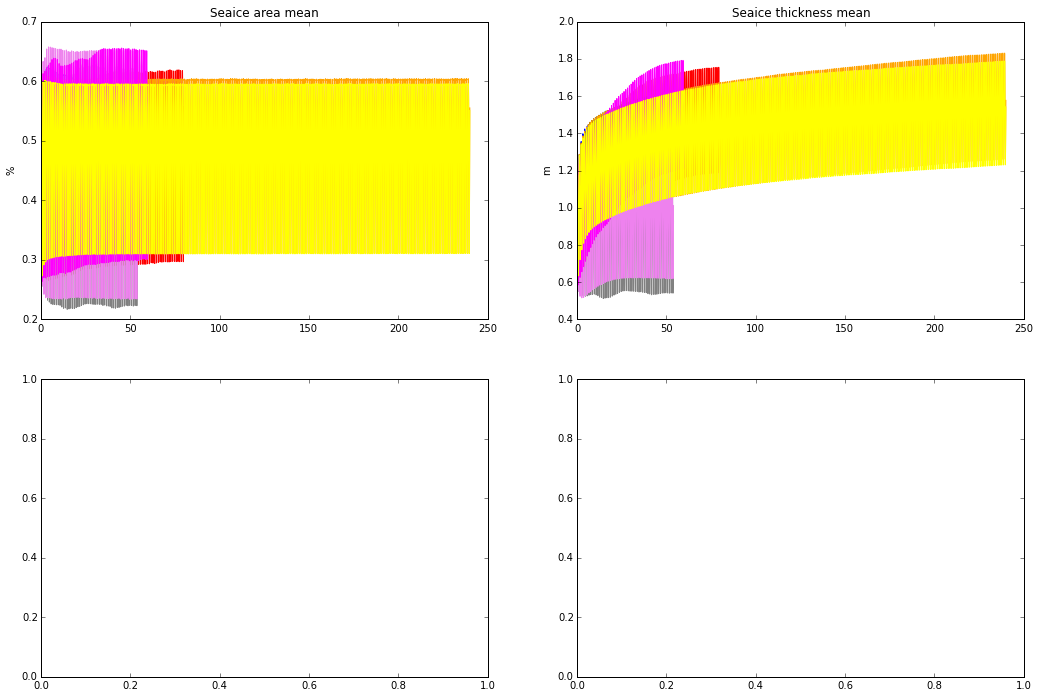

In [95]:
plot_monitor(mon,['seaice_area_mean','seaice_heff_mean'])

In [100]:
monitor_lv1 = {'run_36km' : run_36km , 'run_sponge' : run_sponge , 'run_sponge_noscaled' : run_sponge_noscaled , \
                 'run_sponge_visco_5d' : run_sponge_visco_5d , 'run_18_nonscale' : run_18_nonscale ,
                'run_18_scaled' : run_18_scaled, 'run_CORE_sponge' : run_CORE_sponge ,\
               'run_CORE_nosponge' : run_CORE_nosponge , 'woa' : woa }
titles_lv = { 'run_36km' : 'run_36km' , 'run_sponge' : 'run_sponge' , 'run_sponge_noscaled' : 'run_sponge_noscaled' , \
                 'run_sponge_visco_5d' : 'run_sponge_visco_5d ', 'run_18_nonscale' : 'run_18_nonscale' ,
                'run_18_scaled' : 'run_18_scaled', 'run_CORE_sponge' : 'run_CORE_sponge' , \
             'run_CORE_nosponge' : 'run_CORE_nosponge' , 'woa' : 'woa'}

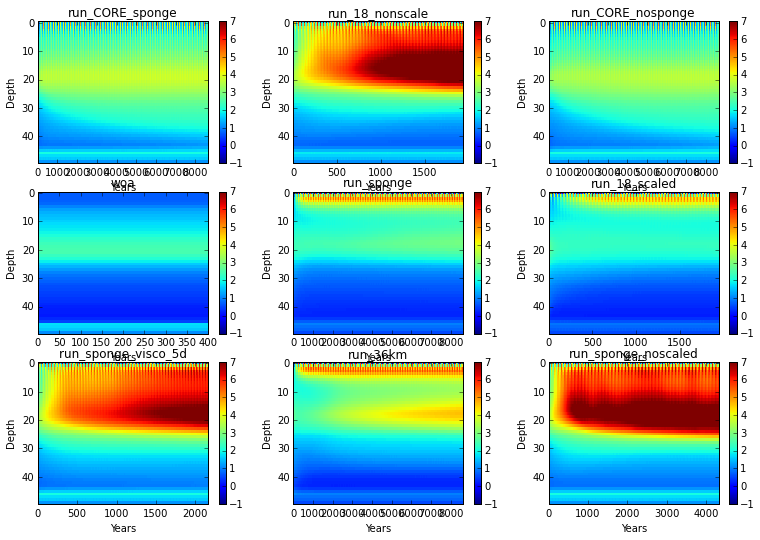

In [101]:
def plot_lv(monitor_list,var,vimin,vimax,cmap,row=3,col=3):
    file2read1 = netcdf.NetCDFFile("/scratch/general/am8e13/results36km/grid.nc",'r')
    Z = file2read1.variables['Zp1']
    Z = Z[0:50]*1
    fig, axes = plt.subplots(nrows=row, ncols=col)
    ax_ind = 0
    for mon in monitor_list:
        #print mon
        ca = axes.flat[ax_ind].imshow(monitor_list[mon].dataDyn[var][0:,:].T,vmin = vimin, vmax = vimax,\
                    interpolation='nearest', cmap = cmap ,origin='upper', aspect='auto')
        cbar = fig.colorbar(ca , ax=axes.flat[ax_ind], )
        axes.flat[ax_ind].set_title(titles_lv[mon])
        axes.flat[ax_ind].set_xlabel('Years')
        axes.flat[ax_ind].set_ylabel('Depth')
        ax_ind += 1
    fig.subplots_adjust(right=1.8,top=1.8)
plot_lv(monitor_lv1,'theta_lv_mean',-1,7,matplotlib.cm.jet)

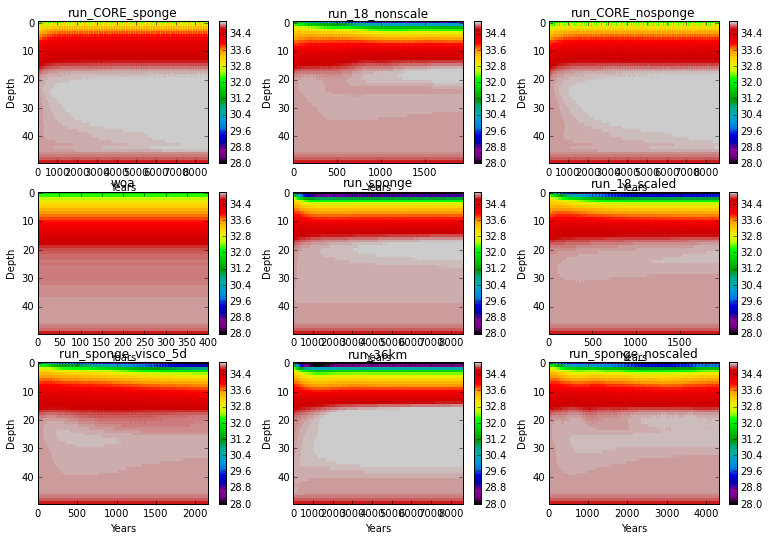

In [102]:
plot_lv(monitor_lv1,'salt_lv_mean',28,35,matplotlib.cm.nipy_spectral)

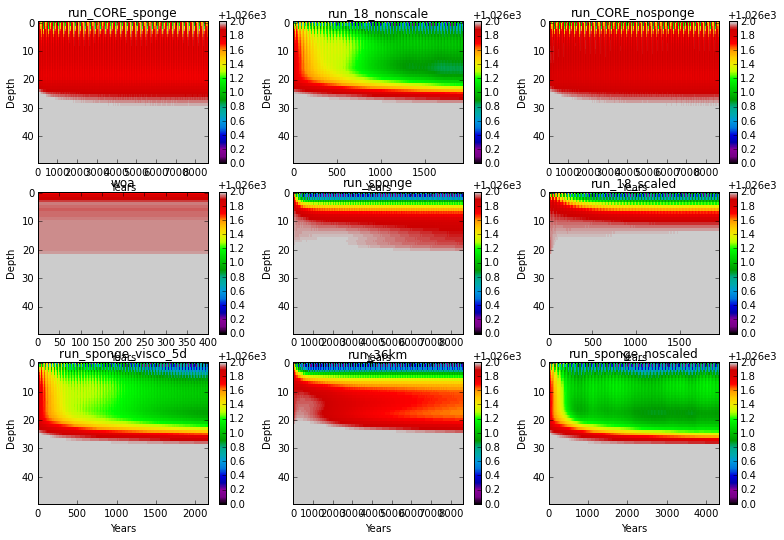

In [103]:
plot_lv(monitor_lv1,'rho_lv_mean',1026,1028,matplotlib.cm.nipy_spectral)

In [104]:
NCEP = read_forcing('/scratch/general/am8e13/NCEP_data/','cube78_',1992,16)   
ERA = read_forcing('/scratch/general/am8e13/ERA_data/','ERA40g_',1979,23)
JRA = read_forcing('/scratch/general/am8e13/cs_36km_tutorial/climdata/','jra25_',1979,24)
CORE2,time_core = read_core('/scratch/general/am8e13/CORE2_data/')
titles, unity = dataset_unity()

read cube78_
read ERA40g_
read jra25_
read CORE2


ERA in black with average in red
JRA in blue with average in yellow
NCEP in green with average in orange


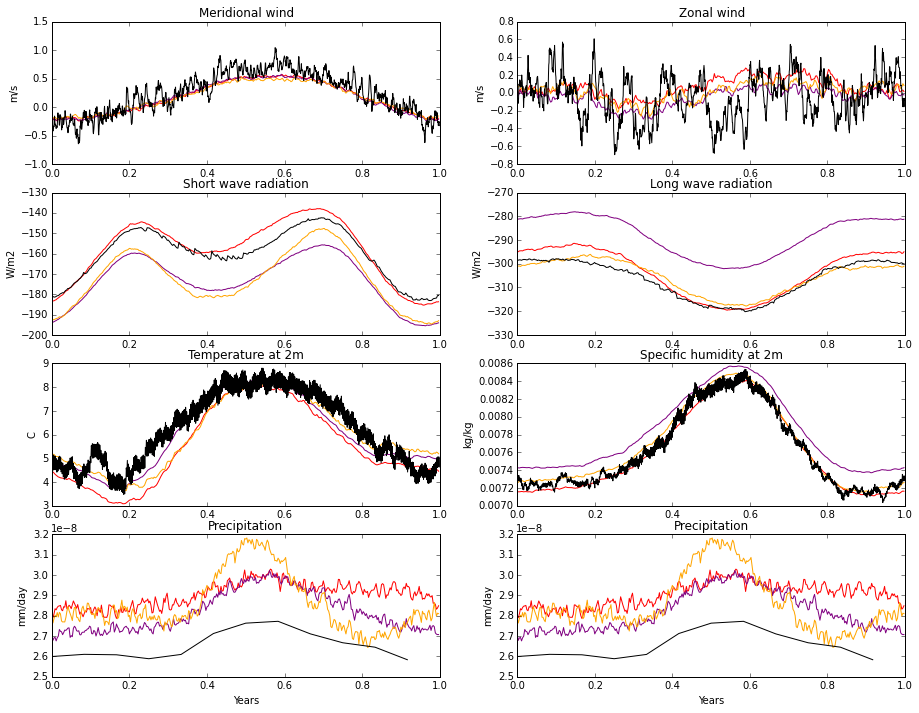

In [105]:
fig, axes = plt.subplots(4,2)
yp =1
ax_ind = 0
ord_var = ['v10m','u10m','dsw','dlw','tmp2m_degC','spfh2m','rain','rain']
time = np.array(range(len(ERA['data']['v10m'])))/360.

for var in ord_var:
    if var == 'rain' or var == 'rain_new33':
        axes.flat[ax_ind].set_xlabel('Years')
    if var == 'rain_ne3':
        var='Et'
    else:        
        #axes.flat[ax_ind].plot(time[0:360*yp],ERA['data'][var][0:360*yp],'black')
        #axes.flat[ax_ind].plot(time[0:360*yp],JRA['data'][var][0:360*yp],'blue')
        #axes.flat[ax_ind].plot(time[0:360*yp],NCEP['data'][var][0:360*yp],'green')
        axes.flat[ax_ind].plot(time[0:360*yp],ERA['data_ave'][var][0:360*yp],'red')
        axes.flat[ax_ind].plot(time[0:360*yp],JRA['data_ave'][var][0:360*yp],'purple')
        axes.flat[ax_ind].plot(time[0:360*yp],NCEP['data_ave'][var][0:360*yp],'orange')
        axes.flat[ax_ind].plot(time_core[var],CORE2['data_ave'][var],'black')
        axes.flat[ax_ind].set_title(titles[var])
        axes.flat[ax_ind].set_ylabel(unity[var])
        ax_ind +=  1
    #yp = 4

print 'ERA in black with average in red'
print 'JRA in blue with average in yellow'
print 'NCEP in green with average in orange'
fig.subplots_adjust(right=2.1,top=2.4)

In [106]:
obcs_no = Obcs()
obcs_no.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/obcsdata/newdownloaded/',12,'',36)
obcs1 = Obcs()
obcs1.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/obcsdata/newdownloaded/',12,'_tempmod1',36)
obcs2 = Obcs()
obcs2.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/obcsdata/newdownloaded/',12,'_tempmod2',36)
obcs3 = Obcs()
obcs3.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/obcsdata/newdownloaded/',12,'_tempmod3',36)

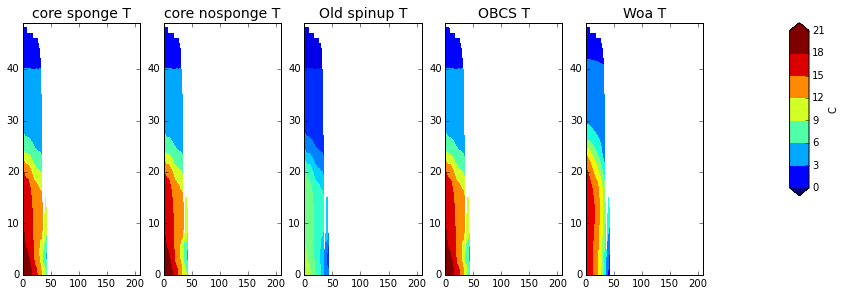

In [107]:
plot_obcs(CORE_sponge,CORE_nosponge,first_spinup,obcs_no,woa,loc='N',var='T',vmin=-1,vmax=18)

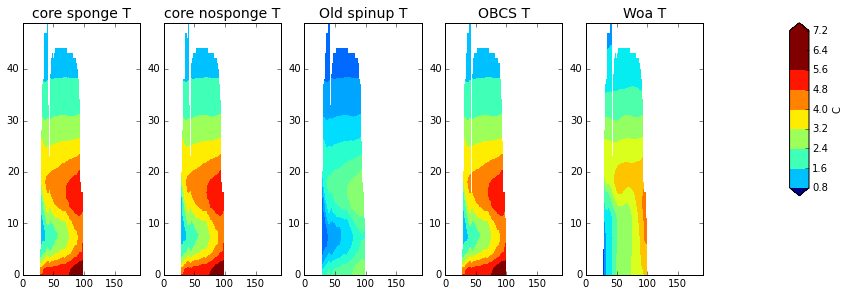

In [108]:
plot_obcs(CORE_sponge,CORE_nosponge,first_spinup,obcs_no,woa,loc='E',var='T',vmin=-1,vmax=6)

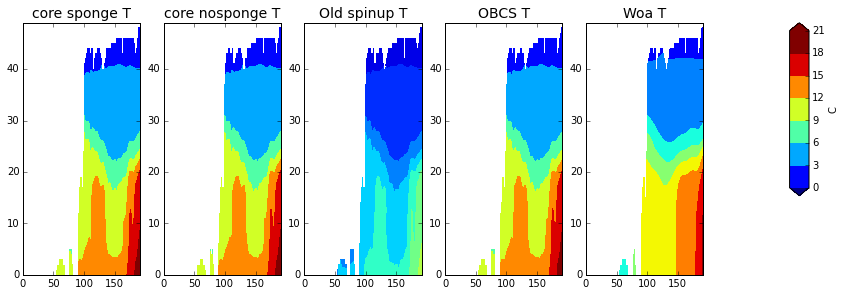

In [109]:
plot_obcs(CORE_sponge,CORE_nosponge,first_spinup,obcs_no,woa,loc='W',var='T',vmin=-1,vmax=18)